In [206]:
import pandas as pd
from datasets import load_from_disk
from tqdm import tqdm
import numpy as np
import sys
import os
import librosa
from tqdm import tqdm
import io
tqdm.pandas()
sys.path.append('/Users/markjos/projects/malachor5/scripts')
from asr_dataset import clip_segment, validate_clipfile

In [207]:
split_ds_path='/Users/markjos/projects/malachor5/data/pyarrow-datasets/tira-clean-split'

In [208]:
ds=load_from_disk(split_ds_path)
ds

DatasetDict({
    train: Dataset({
        features: ['audio', 'start', 'end', 'transcription', 'eaf_source', 'wav_source', 'raw_transcription', 'clip', 'wav_rawpath', 'path', 'allosaurus', 'clap_ipa_cos_sim', 'wada_snr', 'nist_stnr', 'speaker-diarization-3.1', 'voice-activity-detection', 'whisper-large-v3', 'clapipa-transcription-allosaurus', 'vad_s', 'drz_s', 'trans_len', 'pcnt_speech', 'trans_len_sq', 'trans_len_log', 'cos_sim_softmax', 'cos_sim_log', 'duration'],
        num_rows: 16384
    })
    validation: Dataset({
        features: ['audio', 'start', 'end', 'transcription', 'eaf_source', 'wav_source', 'raw_transcription', 'clip', 'wav_rawpath', 'path', 'allosaurus', 'clap_ipa_cos_sim', 'wada_snr', 'nist_stnr', 'speaker-diarization-3.1', 'voice-activity-detection', 'whisper-large-v3', 'clapipa-transcription-allosaurus', 'vad_s', 'drz_s', 'trans_len', 'pcnt_speech', 'trans_len_sq', 'trans_len_log', 'cos_sim_softmax', 'cos_sim_log', 'duration'],
        num_rows: 2048
    })
    

In [209]:
# df=pd.DataFrame(columns=ds['train'].column_names+['split'])
split_dfs=[]
for split in ds:
    split_df=ds[split].remove_columns('audio').to_pandas()
    split_df['split']=split
    split_dfs.append(split_df)
df=pd.concat(split_dfs, ignore_index=True)
print(df.shape)
df.head()

(20480, 27)


,start,end,transcription,eaf_source,wav_source,raw_transcription,clip,wav_rawpath,path,allosaurus,...,vad_s,drz_s,trans_len,pcnt_speech,trans_len_sq,trans_len_log,cos_sim_softmax,cos_sim_log,duration,split
0,217011.0,219552.0,àprí jɜ̀dí ðáŋàlà,/Users/markjos/Library/CloudStorage/GoogleDriv...,/Users/markjos/Library/CloudStorage/GoogleDriv...,àprí jɜ̀dí ðáŋàlà,data/tira-asr/clips/HH01082021-m03s37ms011-m03...,/Users/markjos/Library/CloudStorage/GoogleDriv...,HH01082021-m03s37ms011-m03s39ms552.wav,a e i a d i ɡ a m a l a,...,2.379,2.447,23,0.936246,3.135494,3.135494,0.000044,-10.039731,2.541,train
1,221371.0,225023.0,àprí jɜ̀dí ðáŋàlà,/Users/markjos/Library/CloudStorage/GoogleDriv...,/Users/markjos/Library/CloudStorage/GoogleDriv...,àprí jɜ̀dí ðáŋàlà,data/tira-asr/clips/HH01082021-m03s41ms371-m03...,/Users/markjos/Library/CloudStorage/GoogleDriv...,HH01082021-m03s41ms371-m03s45ms023.wav,a j a d i v a n a l a,...,3.375,3.510,23,0.924151,3.135494,3.135494,0.000044,-10.028157,3.652,train
2,283401.0,286528.0,àprí jə̀və̀lɛ̀ðɔ́ ðáŋàlà,/Users/markjos/Library/CloudStorage/GoogleDriv...,/Users/markjos/Library/CloudStorage/GoogleDriv...,àprí jə̀və̀lɛ̀ðɔ́ ðáŋàlà,data/tira-asr/clips/HH01082021-m04s43ms401-m04...,/Users/markjos/Library/CloudStorage/GoogleDriv...,HH01082021-m04s43ms401-m04s46ms528.wav,a p e i e p e l e ð a l a m a l a,...,3.088,3.037,29,0.987528,3.367296,3.367296,0.000042,-10.080580,3.127,train
3,288835.0,291580.0,àprí jə̀və̀lɛ̀ðɔ́ ðáŋàlà,/Users/markjos/Library/CloudStorage/GoogleDriv...,/Users/markjos/Library/CloudStorage/GoogleDriv...,àprí jə̀və̀lɛ̀ðɔ́ ðáŋàlà,data/tira-asr/clips/HH01082021-m04s48ms835-m04...,/Users/markjos/Library/CloudStorage/GoogleDriv...,HH01082021-m04s48ms835-m04s51ms580.wav,a t e i j a p e d e ð a ɡ a n a ð a,...,2.413,2.649,29,0.879053,3.367296,3.367296,0.000044,-10.025673,2.745,train
4,304737.0,307762.0,àprí jə̀və̀lɛ̀ðɔ́ ðáŋàlà,/Users/markjos/Library/CloudStorage/GoogleDriv...,/Users/markjos/Library/CloudStorage/GoogleDriv...,àprí jə̀və̀lɛ̀ðɔ́ ðáŋàlà,data/tira-asr/clips/HH01082021-m05s04ms737-m05...,/Users/markjos/Library/CloudStorage/GoogleDriv...,HH01082021-m05s04ms737-m05s07ms762.wav,a e j e ð e d e ð a l a m a l a,...,2.920,2.919,29,0.965289,3.367296,3.367296,0.000042,-10.068530,3.025,train


In [211]:
train_len=df[df['split']=='train'].shape[0]
train_hours=df.loc[df['split']=='train', 'duration'].sum()/3_600
print(f"Train records: {train_len}\t\ttrain hours {train_hours}")

validation_len=df[df['split']=='validation'].shape[0]
validation_hours=df.loc[df['split']=='validation', 'duration'].sum()/3_600
print(f"Validation records: {validation_len}\tvalidation hours {validation_hours}")

test_len=df[df['split']=='test'].shape[0]
test_hours=df.loc[df['split']=='test', 'duration'].sum()/3_600
print(f"Test records: {test_len}\t\ttest hours {test_hours}")


Train records: 16384		train hours 9.475035277777778
Validation records: 2048	validation hours 1.126686388888889
Test records: 2048		test hours 0.6514258333333333


In [6]:
df.loc[0]

start                                                                        217011.0
end                                                                          219552.0
transcription                                                 àprí jɜ̀dí ðáŋàlà
eaf_source                          /Users/markjos/Library/CloudStorage/GoogleDriv...
wav_source                          /Users/markjos/Library/CloudStorage/GoogleDriv...
raw_transcription                                             àprí jɜ̀dí ðáŋàlà
clip                                data/tira-asr/clips/HH01082021-m03s37ms011-m03...
wav_rawpath                         /Users/markjos/Library/CloudStorage/GoogleDriv...
path                                           HH01082021-m03s37ms011-m03s39ms552.wav
allosaurus                                                    a e i a d i ɡ a m a l a
clap_ipa_cos_sim                                                             0.705214
wada_snr                                              

There are 45 ungrammatical sentences in the dataset. Whoops.

In [7]:
df['raw_transcription'].str.contains('\*').value_counts()

raw_transcription
False    20435
True        45
Name: count, dtype: int64

The train split contains 21 recordings not found in test or validation. Neither test nor validation partitions have any recordings only found in them, but they each have 1 recording not found in train.

In [8]:
train=df['split']=='train'
validation=df['split']=='validation'
test=df['split']=='test'

train_wavs=pd.Series(df[train]['wav_source'].unique())
val_wavs=pd.Series(df[validation]['wav_source'].unique())
test_wavs=pd.Series(df[test]['wav_source'].unique())

df['split']
train_only = train_wavs[~train_wavs.isin(val_wavs) & ~train_wavs.isin(test_wavs)]
val_only = val_wavs[~val_wavs.isin(train_wavs)]# & ~val_wavs.isin(test_wavs)]
test_only = test_wavs[~test_wavs.isin(train_wavs)]# & ~test_wavs.isin(val_wavs)]

train_only.shape, val_only.shape, test_only.shape

((21,), (1,), (1,))

Let's add 30s before and after each record and see how many overlaps we create.

In [9]:
# remaining=((30-df['duration'])*1_000).astype(int)
df['long_start']=df['start']-30_000
df['long_end']=df['end']+30_000
df[['long_start', 'long_end']]

,long_start,long_end
0,187011.0,249552.0
1,191371.0,255023.0
2,253401.0,316528.0
3,258835.0,321580.0
4,274737.0,337762.0
...,...,...
20475,554799.0,615373.0
20476,1964053.0,2024599.0
20477,1402547.0,1463467.0
20478,1587160.0,1647733.0


In [10]:
def find_overlap(row):
    start=row['long_start']
    end=row['long_end']
    wav=row['wav_source']

    has_wav=df['wav_source']==wav
    after_start=df['start']>=start
    before_end=df['end']<=end
    overlap=has_wav&after_start&before_end
    return df.loc[overlap].index.tolist()
df['overlap']=df.apply(find_overlap, axis=1)
df['overlap']

0                                                   [0, 1]
1                                                   [0, 1]
2                                                [2, 3, 4]
3                                                [2, 3, 4]
4                                                [2, 3, 4]
                               ...                        
20475    [15837, 15838, 15839, 15840, 15841, 15842, 158...
20476                                [15913, 15914, 20476]
20477    [16018, 16019, 16020, 16021, 16022, 16023, 160...
20478                                [16025, 16026, 20478]
20479                  [16366, 16367, 16368, 16369, 20479]
Name: overlap, Length: 20480, dtype: object

In [11]:
df['num_overlap']=df['overlap'].apply(len)
df['num_overlap'].mean()

6.39443359375

In [12]:
get_split_from_index = lambda ilist: [df.at[i, 'split'] for i in ilist]
df['overlap_split']=df['overlap'].apply(get_split_from_index)
df['overlap_split']

0                                           [train, train]
1                                           [train, train]
2                                    [train, train, train]
3                                    [train, train, train]
4                                    [train, train, train]
                               ...                        
20475    [train, train, train, train, train, train, tra...
20476                                 [train, train, test]
20477    [train, train, train, train, train, train, tra...
20478                                 [train, train, test]
20479                   [train, train, train, train, test]
Name: overlap_split, Length: 20480, dtype: object

In [13]:
df['overlap_split'].apply(set).value_counts()

overlap_split
{train}                      13367
{validation, train}           2322
{train, test}                 2124
{test}                         931
{validation}                   921
{validation, test}             438
{validation, train, test}      377
Name: count, dtype: int64

Let's pick a subset of records such that there is overlap between any of them.
Let's also exclude an record which has labels from multiple splits included.

In [14]:
collapsed_idcs=[]
covered_idcs=[]
for i, row in tqdm(df.iterrows(), total=len(df)):
    if len(set(row['overlap_split']))>1:
        # ignore recrods that overlap with labels from multiple partitions
        continue
    # if no labels in this record have been picked already, add to subset
    if not any(j in collapsed_idcs for j in row['overlap']):
        collapsed_idcs.append(i)
        covered_idcs.extend(row['overlap'])
df_sub=df.loc[collapsed_idcs]
df_sub.shape

100%|██████████| 20480/20480 [00:02<00:00, 9913.09it/s]


(5354, 32)

Let's update the 'start', 'end' and 'transcription' columns to have the values for each label within the interval.

In [15]:
get_values_for_overlap_span = lambda idcs, col: df.loc[idcs][col].tolist()

df_sub['start_list']=df['overlap'].apply(lambda x: get_values_for_overlap_span(x, 'start'))
df_sub['end_list']=df['overlap'].apply(lambda x: get_values_for_overlap_span(x, 'end'))
df_sub['trans_list']=df['overlap'].apply(lambda x: get_values_for_overlap_span(x, 'transcription'))

In [16]:
df_sub['trans_list']

0        [àprí jɜ̀dí ðáŋàlà, àprí jɜ̀dí ðáŋà...
2        [àprí jə̀və̀lɛ̀ðɔ́ ðáŋàlà, àprí jə̀və̀l...
5        [àprí jàvə́lɛ̀ðɛ̌ ðàŋàlà, àprí jàvə́l...
7        [àprí jávə̀lɛ̀ðɔ́ ðáŋàlà, àprí jávə̀l...
10       [àprí jávə̀lɛ̀ðɔ́ ðáŋàlà, àprí jávə̀l...
                               ...                        
20439                                         [làrdɜ̀dì]
20440                                       [lɛ̀àrdɛ̀dì]
20455    [là t̪ə́rvàvɛ̀, là t̪ə́rvàvì, lìjàjɔ̀, ...
20459    [lìjàjɔ̀, là jájɛ̀, là jájɛ̀, lə̀jàrjɔ́...
20466                                   [là bŕɽàɽìðì]
Name: trans_list, Length: 5354, dtype: object

Let's load phone embeddings so we can find which records have the most diversity of Tira labels

In [17]:
import torch
from torch.nn.functional import cosine_similarity
phone_embed_path='/Users/markjos/projects/malachor5/data/pyarrow-datasets/tira-clean-split/clap_ipa_phone_embeds.pt'
embeds=torch.load(phone_embed_path)
embeds.shape

torch.Size([20480, 512])

In [18]:
cosine_similarity(embeds, embeds, dim=1).shape

torch.Size([20480])

In [19]:
embeds.mean(dim=0).shape

torch.Size([512])

<Axes: >

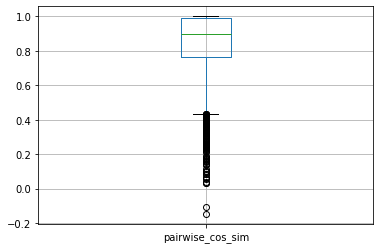

In [20]:
def pairwise_cos_sim(idcs):
    if len(idcs)==0:
        return 1
    embed_list=[]
    comparanda=[]
    for i in idcs:
        embed=embeds[i]
        other_idcs = [j for j in idcs if j!=i]
        other_embeds = embeds[other_idcs]
        embed_list.append(embed)
        comparanda.append(other_embeds.mean(dim=0))
    return cosine_similarity(torch.stack(embed_list), torch.stack(comparanda)).mean().item()

df_sub['pairwise_cos_sim']=df_sub['overlap'].apply(pairwise_cos_sim)
df_sub.boxplot('pairwise_cos_sim')

In [29]:
df_sub=df_sub.rename({
    'start':'old_start',
    'end':'old_end',
    'long_start':'start',
    'long_end':'end',
}, axis=1)
df_sub.head()

,old_start,old_end,transcription,eaf_source,wav_source,raw_transcription,clip,wav_rawpath,path,allosaurus,...,split,start,end,overlap,num_overlap,overlap_split,start_list,end_list,trans_list,pairwise_cos_sim
0,217011.0,219552.0,àprí jɜ̀dí ðáŋàlà,/Users/markjos/Library/CloudStorage/GoogleDriv...,/Users/markjos/Library/CloudStorage/GoogleDriv...,àprí jɜ̀dí ðáŋàlà,data/tira-asr/clips/HH01082021-m03s37ms011-m03...,/Users/markjos/Library/CloudStorage/GoogleDriv...,HH01082021-m03s37ms011-m03s39ms552.wav,a e i a d i ɡ a m a l a,...,train,187011.0,249552.0,"[0, 1]",2,"[train, train]","[217011.0, 221371.0]","[219552.0, 225023.0]","[àprí jɜ̀dí ðáŋàlà, àprí jɜ̀dí ðáŋà...",0.659426
2,283401.0,286528.0,àprí jə̀və̀lɛ̀ðɔ́ ðáŋàlà,/Users/markjos/Library/CloudStorage/GoogleDriv...,/Users/markjos/Library/CloudStorage/GoogleDriv...,àprí jə̀və̀lɛ̀ðɔ́ ðáŋàlà,data/tira-asr/clips/HH01082021-m04s43ms401-m04...,/Users/markjos/Library/CloudStorage/GoogleDriv...,HH01082021-m04s43ms401-m04s46ms528.wav,a p e i e p e l e ð a l a m a l a,...,train,253401.0,316528.0,"[2, 3, 4]",3,"[train, train, train]","[283401.0, 288835.0, 304737.0]","[286528.0, 291580.0, 307762.0]","[àprí jə̀və̀lɛ̀ðɔ́ ðáŋàlà, àprí jə̀və̀l...",0.270774
5,373451.0,377362.0,àprí jàvə́lɛ̀ðɛ̌ ðàŋàlà,/Users/markjos/Library/CloudStorage/GoogleDriv...,/Users/markjos/Library/CloudStorage/GoogleDriv...,àprí jàvə́lɛ̀ðɛ̌ ðàŋàlà,data/tira-asr/clips/HH01082021-m06s13ms451-m06...,/Users/markjos/Library/CloudStorage/GoogleDriv...,HH01082021-m06s13ms451-m06s17ms362.wav,a p i j a b ɛ l ɛ j e d e b a ŋ a l a,...,train,343451.0,407362.0,"[5, 6]",2,"[train, train]","[373451.0, 378899.0]","[377362.0, 383279.0]","[àprí jàvə́lɛ̀ðɛ̌ ðàŋàlà, àprí jàvə́l...",0.285611
7,514659.0,518038.0,àprí jávə̀lɛ̀ðɔ́ ðáŋàlà,/Users/markjos/Library/CloudStorage/GoogleDriv...,/Users/markjos/Library/CloudStorage/GoogleDriv...,àprí jávə̀lɛ̀ðɔ́ ðáŋàlà,data/tira-asr/clips/HH01082021-m08s34ms659-m08...,/Users/markjos/Library/CloudStorage/GoogleDriv...,HH01082021-m08s34ms659-m08s38ms038.wav,a p r e ʂ i j a b ɛ l i ð ɔ r a ŋ a n a,...,train,484659.0,548038.0,"[7, 8, 9]",3,"[train, train, train]","[514659.0, 524380.0, 540389.0]","[518038.0, 527963.0, 543475.0]","[àprí jávə̀lɛ̀ðɔ́ ðáŋàlà, àprí jávə̀l...",0.690790
10,564731.0,567740.0,àprí jávə̀lɛ̀ðɔ́ ðáŋàlà,/Users/markjos/Library/CloudStorage/GoogleDriv...,/Users/markjos/Library/CloudStorage/GoogleDriv...,àprí jávə̀lɛ̀ðɔ́ ðáŋàlà,data/tira-asr/clips/HH01082021-m09s24ms731-m09...,/Users/markjos/Library/CloudStorage/GoogleDriv...,HH01082021-m09s24ms731-m09s27ms740.wav,a e a b l e ð e ð a m a ð a,...,train,534731.0,597740.0,"[9, 10, 11]",3,"[train, train, train]","[540389.0, 564731.0, 590317.0]","[543475.0, 567740.0, 593363.0]","[àprí jávə̀lɛ̀ðɔ́ ðáŋàlà, àprí jávə̀l...",0.920946


In [34]:
for column in ['start', 'end', 'old_start', 'old_end']:
    df_sub[column]=df_sub[column].astype(int)
df_sub.head()

,old_start,old_end,transcription,eaf_source,wav_source,raw_transcription,clip,wav_rawpath,path,allosaurus,...,split,start,end,overlap,num_overlap,overlap_split,start_list,end_list,trans_list,pairwise_cos_sim
0,217011,219552,àprí jɜ̀dí ðáŋàlà,/Users/markjos/Library/CloudStorage/GoogleDriv...,/Users/markjos/Library/CloudStorage/GoogleDriv...,àprí jɜ̀dí ðáŋàlà,data/tira-asr/clips/HH01082021-m03s37ms011-m03...,/Users/markjos/Library/CloudStorage/GoogleDriv...,HH01082021-m03s37ms011-m03s39ms552.wav,a e i a d i ɡ a m a l a,...,train,187011,249552,"[0, 1]",2,"[train, train]","[217011.0, 221371.0]","[219552.0, 225023.0]","[àprí jɜ̀dí ðáŋàlà, àprí jɜ̀dí ðáŋà...",0.659426
2,283401,286528,àprí jə̀və̀lɛ̀ðɔ́ ðáŋàlà,/Users/markjos/Library/CloudStorage/GoogleDriv...,/Users/markjos/Library/CloudStorage/GoogleDriv...,àprí jə̀və̀lɛ̀ðɔ́ ðáŋàlà,data/tira-asr/clips/HH01082021-m04s43ms401-m04...,/Users/markjos/Library/CloudStorage/GoogleDriv...,HH01082021-m04s43ms401-m04s46ms528.wav,a p e i e p e l e ð a l a m a l a,...,train,253401,316528,"[2, 3, 4]",3,"[train, train, train]","[283401.0, 288835.0, 304737.0]","[286528.0, 291580.0, 307762.0]","[àprí jə̀və̀lɛ̀ðɔ́ ðáŋàlà, àprí jə̀və̀l...",0.270774
5,373451,377362,àprí jàvə́lɛ̀ðɛ̌ ðàŋàlà,/Users/markjos/Library/CloudStorage/GoogleDriv...,/Users/markjos/Library/CloudStorage/GoogleDriv...,àprí jàvə́lɛ̀ðɛ̌ ðàŋàlà,data/tira-asr/clips/HH01082021-m06s13ms451-m06...,/Users/markjos/Library/CloudStorage/GoogleDriv...,HH01082021-m06s13ms451-m06s17ms362.wav,a p i j a b ɛ l ɛ j e d e b a ŋ a l a,...,train,343451,407362,"[5, 6]",2,"[train, train]","[373451.0, 378899.0]","[377362.0, 383279.0]","[àprí jàvə́lɛ̀ðɛ̌ ðàŋàlà, àprí jàvə́l...",0.285611
7,514659,518038,àprí jávə̀lɛ̀ðɔ́ ðáŋàlà,/Users/markjos/Library/CloudStorage/GoogleDriv...,/Users/markjos/Library/CloudStorage/GoogleDriv...,àprí jávə̀lɛ̀ðɔ́ ðáŋàlà,data/tira-asr/clips/HH01082021-m08s34ms659-m08...,/Users/markjos/Library/CloudStorage/GoogleDriv...,HH01082021-m08s34ms659-m08s38ms038.wav,a p r e ʂ i j a b ɛ l i ð ɔ r a ŋ a n a,...,train,484659,548038,"[7, 8, 9]",3,"[train, train, train]","[514659.0, 524380.0, 540389.0]","[518038.0, 527963.0, 543475.0]","[àprí jávə̀lɛ̀ðɔ́ ðáŋàlà, àprí jávə̀l...",0.690790
10,564731,567740,àprí jávə̀lɛ̀ðɔ́ ðáŋàlà,/Users/markjos/Library/CloudStorage/GoogleDriv...,/Users/markjos/Library/CloudStorage/GoogleDriv...,àprí jávə̀lɛ̀ðɔ́ ðáŋàlà,data/tira-asr/clips/HH01082021-m09s24ms731-m09...,/Users/markjos/Library/CloudStorage/GoogleDriv...,HH01082021-m09s24ms731-m09s27ms740.wav,a e a b l e ð e ð a m a ð a,...,train,534731,597740,"[9, 10, 11]",3,"[train, train, train]","[540389.0, 564731.0, 590317.0]","[543475.0, 567740.0, 593363.0]","[àprí jávə̀lɛ̀ðɔ́ ðáŋàlà, àprí jávə̀l...",0.920946


In [104]:
codemixed_csv='../data/tira-code-mixed/metadata.csv'

In [ ]:
df_sub.to_csv(codemixed_csv, index=False)

In [105]:
df_sub=pd.read_csv(codemixed_csv)
df_sub.head()

,old_start,old_end,transcription,eaf_source,wav_source,raw_transcription,clip,wav_rawpath,path,allosaurus,...,split,start,end,overlap,num_overlap,overlap_split,start_list,end_list,trans_list,pairwise_cos_sim
0,217011,219552,àprí jɜ̀dí ðáŋàlà,/Users/markjos/Library/CloudStorage/GoogleDriv...,/Users/markjos/Library/CloudStorage/GoogleDriv...,àprí jɜ̀dí ðáŋàlà,data/tira-asr/clips/HH01082021-m03s37ms011-m03...,/Users/markjos/Library/CloudStorage/GoogleDriv...,HH01082021-m03s37ms011-m03s39ms552.wav,a e i a d i ɡ a m a l a,...,train,187011,249552,"[0, 1]",2,"['train', 'train']","[217011.0, 221371.0]","[219552.0, 225023.0]","['àprí jɜ̀dí ðáŋàlà', 'àprí jɜ̀dí ðá...",0.659426
1,283401,286528,àprí jə̀və̀lɛ̀ðɔ́ ðáŋàlà,/Users/markjos/Library/CloudStorage/GoogleDriv...,/Users/markjos/Library/CloudStorage/GoogleDriv...,àprí jə̀və̀lɛ̀ðɔ́ ðáŋàlà,data/tira-asr/clips/HH01082021-m04s43ms401-m04...,/Users/markjos/Library/CloudStorage/GoogleDriv...,HH01082021-m04s43ms401-m04s46ms528.wav,a p e i e p e l e ð a l a m a l a,...,train,253401,316528,"[2, 3, 4]",3,"['train', 'train', 'train']","[283401.0, 288835.0, 304737.0]","[286528.0, 291580.0, 307762.0]","['àprí jə̀və̀lɛ̀ðɔ́ ðáŋàlà', 'àprí jə̀v...",0.270774
2,373451,377362,àprí jàvə́lɛ̀ðɛ̌ ðàŋàlà,/Users/markjos/Library/CloudStorage/GoogleDriv...,/Users/markjos/Library/CloudStorage/GoogleDriv...,àprí jàvə́lɛ̀ðɛ̌ ðàŋàlà,data/tira-asr/clips/HH01082021-m06s13ms451-m06...,/Users/markjos/Library/CloudStorage/GoogleDriv...,HH01082021-m06s13ms451-m06s17ms362.wav,a p i j a b ɛ l ɛ j e d e b a ŋ a l a,...,train,343451,407362,"[5, 6]",2,"['train', 'train']","[373451.0, 378899.0]","[377362.0, 383279.0]","['àprí jàvə́lɛ̀ðɛ̌ ðàŋàlà', 'àprí jàv...",0.285611
3,514659,518038,àprí jávə̀lɛ̀ðɔ́ ðáŋàlà,/Users/markjos/Library/CloudStorage/GoogleDriv...,/Users/markjos/Library/CloudStorage/GoogleDriv...,àprí jávə̀lɛ̀ðɔ́ ðáŋàlà,data/tira-asr/clips/HH01082021-m08s34ms659-m08...,/Users/markjos/Library/CloudStorage/GoogleDriv...,HH01082021-m08s34ms659-m08s38ms038.wav,a p r e ʂ i j a b ɛ l i ð ɔ r a ŋ a n a,...,train,484659,548038,"[7, 8, 9]",3,"['train', 'train', 'train']","[514659.0, 524380.0, 540389.0]","[518038.0, 527963.0, 543475.0]","['àprí jávə̀lɛ̀ðɔ́ ðáŋàlà', 'àprí jáv...",0.690790
4,564731,567740,àprí jávə̀lɛ̀ðɔ́ ðáŋàlà,/Users/markjos/Library/CloudStorage/GoogleDriv...,/Users/markjos/Library/CloudStorage/GoogleDriv...,àprí jávə̀lɛ̀ðɔ́ ðáŋàlà,data/tira-asr/clips/HH01082021-m09s24ms731-m09...,/Users/markjos/Library/CloudStorage/GoogleDriv...,HH01082021-m09s24ms731-m09s27ms740.wav,a e a b l e ð e ð a m a ð a,...,train,534731,597740,"[9, 10, 11]",3,"['train', 'train', 'train']","[540389.0, 564731.0, 590317.0]","[543475.0, 567740.0, 593363.0]","['àprí jávə̀lɛ̀ðɔ́ ðáŋàlà', 'àprí jáv...",0.920946


Let's fix `metadata.csv`, it should only have non-broken records and should include the `file_name` column.

In [112]:
broken_csv='/Users/markjos/projects/malachor5/data/tira-code-mixed/metadata_w_broken.csv'
broken_df=pd.read_csv(broken_csv)
broken_df.shape

((5354, 37), (5318, 42))

In [119]:
invalid_clip_file='/Users/markjos/projects/malachor5/data/tira-code-mixed/invalid_clips.txt'
with open(invalid_clip_file) as f:
    broken_clips=[
        os.path.relpath(line.split()[0], 'data/tira-code-mixed') for line in f.readlines()
    ]
len(broken_clips), broken_clips

(36,
 ['clips/test/HH20220712-2-h-1m59s54ms175-m00s54ms955.wav',
  'clips/test/HH20210927-h-1m59s49ms620-m00s50ms190.wav',
  'clips/test/HH20211123-h-1m59s41ms140-m00s41ms750.wav',
  'clips/train/HH04092021-h-1m59s51ms980-m00s53ms620.wav',
  'clips/train/HH20211116-2-h-1m59s49ms435-m00s52ms089.wav',
  'clips/train/HH20231104-h-1m59s43ms240-m00s45ms600.wav',
  'clips/train/HH09242020-h-1m59s38ms308-m00s39ms708.wav',
  'clips/train/HH20230420-1-Zoom-h-1m59s47ms650-m00s49ms140.wav',
  'clips/train/HH20231229-h-1m59s57ms200-m00s58ms710.wav',
  'clips/train/HH20230929-h-1m59s55ms300-m00s58ms590.wav',
  'clips/train/HH20220828-h-1m59s40ms860-m00s43ms380.wav',
  'clips/train/HH20240126-h-1m59s43ms586-m00s45ms479.wav',
  'clips/train/HH20220405-h-1m59s43ms050-m00s44ms860.wav',
  'clips/train/HH20220224-h-1m59s39ms410-m00s41ms490.wav',
  'clips/train/HH09022020-h-1m59s59ms485-m01s00ms958.wav',
  'clips/train/HH20230524-1-h-1m59s53ms980-m00s57ms380.wav',
  'clips/train/HH20220111-2-h-1m59s48ms89

In [120]:
broken_df['file_name']

0       clips/train/HH01082021-m03s07ms011-m04s09ms552...
1       clips/train/HH01082021-m04s13ms401-m05s16ms528...
2       clips/train/HH01082021-m05s43ms451-m06s47ms362...
3       clips/train/HH01082021-m08s04ms659-m09s08ms038...
4       clips/train/HH01082021-m08s54ms731-m09s57ms740...
                              ...                        
5349    clips/test/HH20231104-m24s55ms175-m25s56ms855.wav
5350    clips/test/HH20231104-m25s26ms450-m26s27ms670.wav
5351    clips/test/HH20231104-m29s43ms445-m30s44ms895.wav
5352    clips/test/HH20231104-m30s17ms145-m31s18ms435.wav
5353    clips/test/HH20231104-m33s08ms935-m34s10ms845.wav
Name: file_name, Length: 5354, dtype: object

In [121]:
is_broken=broken_df['file_name'].isin(broken_clips)
is_broken.value_counts()

file_name
False    5318
True       36
Name: count, dtype: int64

In [125]:
df=broken_df[~is_broken]
df.shape

(5318, 37)

In [123]:
df.to_csv(codemixed_csv, index=False)

In [219]:
df=pd.read_csv(codemixed_csv)

Now that we've got VAD timestamps from PyAnnote, let's make records into 30s long sequences of speech chunks so we can use Whisper to transcribe the individual chunks

In [217]:
vad_csv='/Users/markjos/projects/malachor5/data/tira-code-mixed/tira-code-mixed-vad.csv'
vad_df=pd.read_csv(vad_csv)
vad_df.head()

,old_start,old_end,transcription,eaf_source,wav_source,raw_transcription,clip,wav_rawpath,path,allosaurus,...,split,start,end,overlap,num_overlap,overlap_split,start_list,end_list,trans_list,pairwise_cos_sim
0,217011,219552,àprí jɜ̀dí ðáŋàlà,/Users/markjos/Library/CloudStorage/GoogleDriv...,/Users/markjos/Library/CloudStorage/GoogleDriv...,àprí jɜ̀dí ðáŋàlà,data/tira-asr/clips/HH01082021-m03s37ms011-m03...,/Users/markjos/Library/CloudStorage/GoogleDriv...,HH01082021-m03s07ms011-m04s09ms552.wav,a e i a d i ɡ a m a l a,...,train,187011,249552,"[0, 1]",2,"['train', 'train']","[217011.0, 221371.0]","[219552.0, 225023.0]","['àprí jɜ̀dí ðáŋàlà', 'àprí jɜ̀dí ðá...",0.659426
1,283401,286528,àprí jə̀və̀lɛ̀ðɔ́ ðáŋàlà,/Users/markjos/Library/CloudStorage/GoogleDriv...,/Users/markjos/Library/CloudStorage/GoogleDriv...,àprí jə̀və̀lɛ̀ðɔ́ ðáŋàlà,data/tira-asr/clips/HH01082021-m04s43ms401-m04...,/Users/markjos/Library/CloudStorage/GoogleDriv...,HH01082021-m04s13ms401-m05s16ms528.wav,a p e i e p e l e ð a l a m a l a,...,train,253401,316528,"[2, 3, 4]",3,"['train', 'train', 'train']","[283401.0, 288835.0, 304737.0]","[286528.0, 291580.0, 307762.0]","['àprí jə̀və̀lɛ̀ðɔ́ ðáŋàlà', 'àprí jə̀v...",0.270774
2,373451,377362,àprí jàvə́lɛ̀ðɛ̌ ðàŋàlà,/Users/markjos/Library/CloudStorage/GoogleDriv...,/Users/markjos/Library/CloudStorage/GoogleDriv...,àprí jàvə́lɛ̀ðɛ̌ ðàŋàlà,data/tira-asr/clips/HH01082021-m06s13ms451-m06...,/Users/markjos/Library/CloudStorage/GoogleDriv...,HH01082021-m05s43ms451-m06s47ms362.wav,a p i j a b ɛ l ɛ j e d e b a ŋ a l a,...,train,343451,407362,"[5, 6]",2,"['train', 'train']","[373451.0, 378899.0]","[377362.0, 383279.0]","['àprí jàvə́lɛ̀ðɛ̌ ðàŋàlà', 'àprí jàv...",0.285611
3,514659,518038,àprí jávə̀lɛ̀ðɔ́ ðáŋàlà,/Users/markjos/Library/CloudStorage/GoogleDriv...,/Users/markjos/Library/CloudStorage/GoogleDriv...,àprí jávə̀lɛ̀ðɔ́ ðáŋàlà,data/tira-asr/clips/HH01082021-m08s34ms659-m08...,/Users/markjos/Library/CloudStorage/GoogleDriv...,HH01082021-m08s04ms659-m09s08ms038.wav,a p r e ʂ i j a b ɛ l i ð ɔ r a ŋ a n a,...,train,484659,548038,"[7, 8, 9]",3,"['train', 'train', 'train']","[514659.0, 524380.0, 540389.0]","[518038.0, 527963.0, 543475.0]","['àprí jávə̀lɛ̀ðɔ́ ðáŋàlà', 'àprí jáv...",0.690790
4,564731,567740,àprí jávə̀lɛ̀ðɔ́ ðáŋàlà,/Users/markjos/Library/CloudStorage/GoogleDriv...,/Users/markjos/Library/CloudStorage/GoogleDriv...,àprí jávə̀lɛ̀ðɔ́ ðáŋàlà,data/tira-asr/clips/HH01082021-m09s24ms731-m09...,/Users/markjos/Library/CloudStorage/GoogleDriv...,HH01082021-m08s54ms731-m09s57ms740.wav,a e a b l e ð e ð a m a ð a,...,train,534731,597740,"[9, 10, 11]",3,"['train', 'train', 'train']","[540389.0, 564731.0, 590317.0]","[543475.0, 567740.0, 593363.0]","['àprí jávə̀lɛ̀ðɔ́ ðáŋàlà', 'àprí jáv...",0.920946


Before we continue, gotta insert the `file_name` column from the metadata.

In [220]:
merged_df=pd.merge(vad_df, df[['clip', 'file_name']], how='inner', on='clip')
merged_df.shape, vad_df.shape

((5318, 37), (5318, 36))

In [221]:
vad_df=merged_df

First, let's make the VAD and Tira timestamps into lists of tuples of floats

In [222]:
vad_df['voice-activity-detection']

0       8.182 9.464 SPEECH;11.573 12.603 SPEECH;13.548...
1       0.284 0.976 SPEECH;2.461 6.545 SPEECH;7.051 8....
2       0.031 0.706 SPEECH;4.739 5.988 SPEECH;10.240 1...
3       0.655 0.959 SPEECH;4.047 4.418 SPEECH;5.127 6....
4       5.870 8.536 SPEECH;12.653 14.948 SPEECH;16.805...
                              ...                        
5313    1.516 2.444 SPEECH;3.524 4.553 SPEECH;8.924 9....
5314    0.031 0.925 SPEECH;1.938 4.233 SPEECH;4.570 5....
5315    1.988 2.630 SPEECH;5.245 6.359 SPEECH;8.620 10...
5316    3.102 3.305 SPEECH;3.693 4.148 SPEECH;8.063 10...
5317    0.031 0.757 SPEECH;5.887 9.447 SPEECH;10.392 1...
Name: voice-activity-detection, Length: 5318, dtype: object

In [223]:
def vad_str_to_list(row):
    vad_str=row['voice-activity-detection']
    record_start=row['start']/1_000
    vad_str=vad_str.removesuffix(';')
    segments=vad_str.split(sep=';')
    start_list = [float(segment.split()[0])+record_start for segment in segments]
    end_list = [float(segment.split()[1])+record_start for segment in segments]
    mid_list = [(start+end)/2 for start, end in zip(start_list, end_list)]

    return list(zip(start_list, mid_list, end_list))
vad_df['voice-activity-detection'][0], vad_df['start'][0]/1_000, vad_str_to_list(vad_df.iloc[0])

('8.182 9.464 SPEECH;11.573 12.603 SPEECH;13.548 17.159 SPEECH;17.429 18.796 SPEECH;20.264 21.766 SPEECH;22.694 24.550 SPEECH;25.023 25.343 SPEECH;25.664 28.162 SPEECH;30.153 32.482 SPEECH;34.523 37.797 SPEECH;40.143 41.425 SPEECH;42.826 45.188 SPEECH;46.117 48.563 SPEECH;50.538 52.428 SPEECH;54.082 54.554 SPEECH;55.212 60.359 SPEECH;60.882 61.439 SPEECH;62.063 62.570 SPEECH;',
 187.011,
 [(195.19299999999998, 195.834, 196.475),
  (198.584, 199.099, 199.614),
  (200.559, 202.3645, 204.17),
  (204.44, 205.12349999999998, 205.807),
  (207.275, 208.026, 208.777),
  (209.70499999999998, 210.63299999999998, 211.561),
  (212.034, 212.194, 212.35399999999998),
  (212.675, 213.924, 215.173),
  (217.164, 218.3285, 219.493),
  (221.534, 223.171, 224.808),
  (227.154, 227.795, 228.43599999999998),
  (229.837, 231.018, 232.199),
  (233.128, 234.351, 235.574),
  (237.54899999999998, 238.49399999999997, 239.439),
  (241.093, 241.329, 241.565),
  (242.223, 244.7965, 247.37),
  (247.893, 248.171499999

In [224]:
vad_df['vad_timestamps']=vad_df.apply(vad_str_to_list, axis=1)
vad_df['vad_timestamps']

0       [(195.19299999999998, 195.834, 196.475), (198....
1       [(253.685, 254.031, 254.377), (255.86200000000...
2       [(343.482, 343.81950000000006, 344.15700000000...
3       [(485.31399999999996, 485.466, 485.618), (488....
4       [(540.601, 541.934, 543.2669999999999), (547.3...
                              ...                        
5313    [(1496.691, 1497.155, 1497.619), (1498.6989999...
5314    [(1526.481, 1526.9279999999999, 1527.375), (15...
5315    [(1785.433, 1785.754, 1786.075), (1788.6899999...
5316    [(1820.247, 1820.3485, 1820.45), (1820.838, 18...
5317    [(1988.966, 1989.329, 1989.692), (1994.822, 19...
Name: vad_timestamps, Length: 5318, dtype: object

In [225]:
def get_tira_timestamps(row):
    starts_ms = eval(row['start_list'])
    ends_ms = eval(row['end_list'])
    start_list = [start/1_000 for start in starts_ms]
    end_list = [end/1_000 for end in ends_ms]
    mid_list = [(start+end)/2 for start, end in zip(start_list, end_list)]

    return list(zip(start_list, mid_list, end_list))
tira_timestamps=vad_df.apply(get_tira_timestamps, axis=1)
vad_df['tira_timestamps']=tira_timestamps
vad_df['tira_timestamps']

0       [(217.011, 218.2815, 219.552), (221.371, 223.1...
1       [(283.401, 284.96450000000004, 286.528), (288....
2       [(373.451, 375.40650000000005, 377.362), (378....
3       [(514.659, 516.3485000000001, 518.038), (524.3...
4       [(540.389, 541.932, 543.475), (564.731, 566.23...
                              ...                        
5313           [(1525.175, 1526.0149999999999, 1526.855)]
5314                        [(1556.45, 1557.06, 1557.67)]
5315    [(1803.505, 1804.1550000000002, 1804.805), (18...
5316    [(1828.475, 1829.1999999999998, 1829.925), (18...
5317           [(2018.935, 2019.8899999999999, 2020.845)]
Name: tira_timestamps, Length: 5318, dtype: object

Now let's merge the VAD timestamps with the existing timestamps, preferring Tira in cases of overlap

In [238]:
def merge_timestamps(row):
    vad_timestamps = row['vad_timestamps']
    tira_timestamps = row['tira_timestamps']
    transcriptions = eval(row['trans_list'])
    merged_timestamps = []
    turn_labels = []
    i, j = 0, 0
    while (i<len(vad_timestamps)) and (j<len(tira_timestamps)):
        vad_start, vad_mid, vad_end = vad_timestamps[i]
        start, mid, end = tira_timestamps[j]
        if (vad_mid >= start) and (vad_mid <= end):
            # vad interval overlaps with Tira interval
            # skip vad interval and add Tira
            merged_timestamps.append(tira_timestamps[j])
            turn_labels.append(transcriptions[j])
            i+=1
            j+=1
        elif (vad_start<start):
            # vad interval precedes Tira interval
            # add vad
            merged_timestamps.append(vad_timestamps[i])
            turn_labels.append('VAD')
            i+=1
        else:
            # Tira interval precedes vad
            # add Tira
            merged_timestamps.append(tira_timestamps[j])
            turn_labels.append(transcriptions[j])
            j+=1
    if i<len(vad_timestamps):
        merged_timestamps.extend(vad_timestamps[i:])
        turn_labels.extend('VAD' for _ in vad_timestamps[i:])
    if j<len(tira_timestamps):
        merged_timestamps.extend(tira_timestamps[j:])
        turn_labels.extend(transcriptions[j:])
    return merged_timestamps, turn_labels

vad_df[['tira_timestamps', 'vad_timestamps']].iloc[0], merge_timestamps(vad_df.iloc[0])

(tira_timestamps    [(217.011, 218.2815, 219.552), (221.371, 223.1...
 vad_timestamps     [(195.19299999999998, 195.834, 196.475), (198....
 Name: 0, dtype: object,
 ([(195.19299999999998, 195.834, 196.475),
   (198.584, 199.099, 199.614),
   (200.559, 202.3645, 204.17),
   (204.44, 205.12349999999998, 205.807),
   (207.275, 208.026, 208.777),
   (209.70499999999998, 210.63299999999998, 211.561),
   (212.034, 212.194, 212.35399999999998),
   (212.675, 213.924, 215.173),
   (217.011, 218.2815, 219.552),
   (221.371, 223.197, 225.023),
   (227.154, 227.795, 228.43599999999998),
   (229.837, 231.018, 232.199),
   (233.128, 234.351, 235.574),
   (237.54899999999998, 238.49399999999997, 239.439),
   (241.093, 241.329, 241.565),
   (242.223, 244.7965, 247.37),
   (247.893, 248.17149999999998, 248.45),
   (249.074, 249.3275, 249.581)],
  ['VAD',
   'VAD',
   'VAD',
   'VAD',
   'VAD',
   'VAD',
   'VAD',
   'VAD',
   'àprí jɜ̀dí ðáŋàlà',
   'àprí jɜ̀dí ðáŋàlà',
   'VAD',
   'VAD',

In [239]:
merged_timestamps,merged_labels=zip(*vad_df.apply(merge_timestamps, axis=1))
# vad_df['merged_timestamps']=merged_timestamps
# vad_df['merged_timestamps']
merged_timestamps

([(195.19299999999998, 195.834, 196.475),
  (198.584, 199.099, 199.614),
  (200.559, 202.3645, 204.17),
  (204.44, 205.12349999999998, 205.807),
  (207.275, 208.026, 208.777),
  (209.70499999999998, 210.63299999999998, 211.561),
  (212.034, 212.194, 212.35399999999998),
  (212.675, 213.924, 215.173),
  (217.011, 218.2815, 219.552),
  (221.371, 223.197, 225.023),
  (227.154, 227.795, 228.43599999999998),
  (229.837, 231.018, 232.199),
  (233.128, 234.351, 235.574),
  (237.54899999999998, 238.49399999999997, 239.439),
  (241.093, 241.329, 241.565),
  (242.223, 244.7965, 247.37),
  (247.893, 248.17149999999998, 248.45),
  (249.074, 249.3275, 249.581)],
 [(253.685, 254.031, 254.377),
  (255.86200000000002, 257.904, 259.946),
  (260.452, 261.4225, 262.39300000000003),
  (263.743, 264.148, 264.553),
  (265.818, 266.105, 266.392),
  (267.016, 267.17650000000003, 267.337),
  (267.742, 267.877, 268.012),
  (268.349, 269.01599999999996, 269.683),
  (271.91, 273.007, 274.104),
  (274.627, 276.095

In [240]:
merged_labels

(['VAD',
  'VAD',
  'VAD',
  'VAD',
  'VAD',
  'VAD',
  'VAD',
  'VAD',
  'àprí jɜ̀dí ðáŋàlà',
  'àprí jɜ̀dí ðáŋàlà',
  'VAD',
  'VAD',
  'VAD',
  'VAD',
  'VAD',
  'VAD',
  'VAD',
  'VAD'],
 ['VAD',
  'VAD',
  'VAD',
  'VAD',
  'VAD',
  'VAD',
  'VAD',
  'VAD',
  'VAD',
  'VAD',
  'VAD',
  'àprí jə̀və̀lɛ̀ðɔ́ ðáŋàlà',
  'àprí jə̀və̀lɛ̀ðɔ́ ðáŋàlà',
  'VAD',
  'VAD',
  'VAD',
  'àprí jə̀və̀lɛ̀ðɔ́ ðáŋàlà',
  'VAD',
  'VAD',
  'VAD'],
 ['VAD',
  'VAD',
  'VAD',
  'VAD',
  'VAD',
  'VAD',
  'VAD',
  'VAD',
  'àprí jàvə́lɛ̀ðɛ̌ ðàŋàlà',
  'VAD',
  'àprí jàvə́lɛ̀ðɛ́ ðàŋàlà',
  'VAD',
  'VAD',
  'VAD',
  'VAD',
  'VAD',
  'VAD',
  'VAD',
  'VAD'],
 ['VAD',
  'VAD',
  'VAD',
  'VAD',
  'VAD',
  'VAD',
  'VAD',
  'VAD',
  'VAD',
  'àprí jávə̀lɛ̀ðɔ́ ðáŋàlà',
  'àprí jávə̀lɛ̀ðɔ́ ðáŋàlà',
  'VAD',
  'àprí jávə̀lɛ̀ðɔ́ ðáŋàlà',
  'VAD'],
 ['àprí jávə̀lɛ̀ðɔ́ ðáŋàlà',
  'VAD',
  'VAD',
  'VAD',
  'VAD',
  'VAD',
  'àprí jávə̀lɛ̀ðɔ́ ðáŋà

In [241]:
vad_df['merged_timestamps']=merged_timestamps
vad_df['merged_labels']=merged_labels

For each record,
- identify middle segment
- iteratively add preceding and following segment until adding another would make record longer than 30s

In [236]:
(vad_df['old_start']+vad_df['old_end'])/2_000

0        218.2815
1        284.9645
2        375.4065
3        516.3485
4        566.2355
          ...    
5313    1526.0150
5314    1557.0600
5315    1814.1700
5316    1847.7900
5317    2019.8900
Length: 5318, dtype: float64

In [257]:
def get_total_len(timestamps):
    if len(timestamps)==0:
        return 0
    begin = min(timestamps, key=lambda t:t[0])[0]
    end = max(timestamps, key=lambda t:t[2])[2]
    return end-begin

def trim_to_30s(row):
    midpoint=(row['start']+row['end'])/2_000
    timestamps=row['merged_timestamps']
    labels=row['merged_labels']
    midpoints=np.array([timestamp[1] for timestamp in timestamps])
    dist_from_midpoint=np.abs(midpoints-midpoint)
    
    new_timestamps = []
    new_labels = []
    while (get_total_len(new_timestamps)<30) and dist_from_midpoint.min()<np.inf:
        nearest_mid_i = np.argmin(dist_from_midpoint)
        new_timestamps.append(timestamps[nearest_mid_i])
        new_labels.append(labels[nearest_mid_i])
        dist_from_midpoint[nearest_mid_i]=np.inf
    # exclude last record so we stay under 30s
    new_timestamps=new_timestamps[:-1]
    # sort timestamps by start time
    sorted_labels_and_timestamps = [
        (label, timestamp) for label, timestamp in sorted(zip(new_labels, new_timestamps),
        key=lambda pair: pair[1][0])
    ]
    new_timestamps, new_labels = zip(*sorted_labels_and_timestamps)
    return new_timestamps, new_labels

vad_df['merged_timestamps'][0], trim_to_30s(vad_df.iloc[0])

([(195.19299999999998, 195.834, 196.475),
  (198.584, 199.099, 199.614),
  (200.559, 202.3645, 204.17),
  (204.44, 205.12349999999998, 205.807),
  (207.275, 208.026, 208.777),
  (209.70499999999998, 210.63299999999998, 211.561),
  (212.034, 212.194, 212.35399999999998),
  (212.675, 213.924, 215.173),
  (217.011, 218.2815, 219.552),
  (221.371, 223.197, 225.023),
  (227.154, 227.795, 228.43599999999998),
  (229.837, 231.018, 232.199),
  (233.128, 234.351, 235.574),
  (237.54899999999998, 238.49399999999997, 239.439),
  (241.093, 241.329, 241.565),
  (242.223, 244.7965, 247.37),
  (247.893, 248.17149999999998, 248.45),
  (249.074, 249.3275, 249.581)],
 (('VAD',
   'VAD',
   'VAD',
   'VAD',
   'VAD',
   'VAD',
   'VAD',
   'VAD',
   'àprí jɜ̀dí ðáŋàlà',
   'àprí jɜ̀dí ðáŋàlà'),
  ((195.19299999999998, 195.834, 196.475),
   (198.584, 199.099, 199.614),
   (200.559, 202.3645, 204.17),
   (204.44, 205.12349999999998, 205.807),
   (207.275, 208.026, 208.777),
   (209.704999999999

In [258]:
vad_df['turn_labels'], vad_df['timestamps']=zip(*vad_df.apply(trim_to_30s, axis=1))
vad_df['timestamps']

0       ((195.19299999999998, 195.834, 196.475), (198....
1       ((253.685, 254.031, 254.377), (255.86200000000...
2       ((343.482, 343.81950000000006, 344.15700000000...
3       ((485.31399999999996, 485.466, 485.618), (488....
4       ((540.389, 541.932, 543.475), (547.384, 548.53...
                              ...                        
5313    ((1496.691, 1497.155, 1497.619), (1498.6989999...
5314    ((1526.481, 1526.9279999999999, 1527.375), (15...
5315    ((1785.433, 1785.754, 1786.075), (1788.6899999...
5316    ((1820.247, 1820.3485, 1820.45), (1820.838, 18...
5317    ((1988.966, 1989.329, 1989.692), (1994.822, 19...
Name: timestamps, Length: 5318, dtype: object

In [259]:
vad_df['turn_labels']

0       (VAD, VAD, VAD, VAD, VAD, VAD, VAD, VAD, àpri...
1       (VAD, VAD, VAD, VAD, VAD, VAD, VAD, VAD, VAD, ...
2                (VAD, VAD, VAD, VAD, VAD, VAD, VAD, VAD)
3           (VAD, VAD, VAD, VAD, VAD, VAD, VAD, VAD, VAD)
4       (àprí jávə̀lɛ̀ðɔ́ ðáŋàlà, VAD, VAD, VAD,...
                              ...                        
5313    (VAD, VAD, VAD, VAD, VAD, VAD, VAD, VAD, VAD, ...
5314    (VAD, VAD, VAD, VAD, VAD, VAD, VAD, VAD, VAD, ...
5315    (VAD, VAD, VAD, VAD, VAD, VAD, VAD, là t̪ə́rv...
5316    (VAD, VAD, VAD, lìjàjɔ̀, là jájɛ̀, là já...
5317        (VAD, VAD, VAD, VAD, VAD, VAD, VAD, VAD, VAD)
Name: turn_labels, Length: 5318, dtype: object

In [246]:
vad_df['60s_start']=vad_df['start']
vad_df['60s_end']=vad_df['end']

In [262]:
vad_df['60s_start'], vad_df['start']

(0        187011
 1        253401
 2        343451
 3        484659
 4        534731
          ...   
 5313    1495175
 5314    1526450
 5315    1783445
 5316    1817145
 5317    1988935
 Name: 60s_start, Length: 5318, dtype: int64,
 0        212.675
 1        277.698
 2        376.540
 3        509.462
 4        562.673
           ...   
 5313    1524.687
 5314    1555.168
 5315    1812.079
 5316    1843.855
 5317    2015.021
 Name: start, Length: 5318, dtype: float64)

In [263]:
vad_df['start']=vad_df['timestamps'].apply(lambda l:l[0][0])
vad_df['end']=vad_df['timestamps'].apply(lambda l:l[-1][-1])
vad_df['duration']=vad_df['end']-vad_df['start']

vad_df[['start', 'end', 'duration']]

,start,end,duration
0,195.193,225.023,29.830
1,253.685,280.854,27.169
2,343.482,372.946,29.464
3,485.314,512.753,27.439
4,540.389,570.334,29.945
...,...,...,...
5313,1496.691,1524.973,28.282
5314,1526.481,1554.898,28.417
5315,1785.433,1814.895,29.462
5316,1820.247,1848.435,28.188


<Axes: >

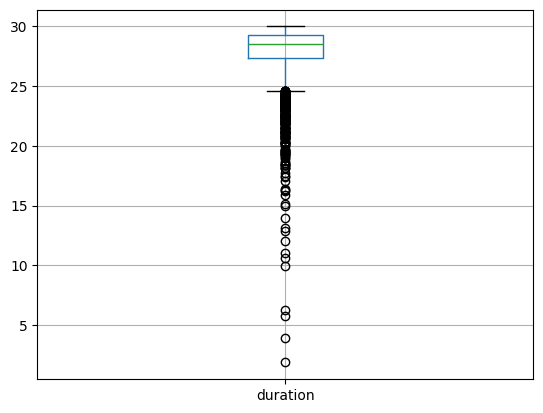

In [264]:
vad_df.boxplot('duration')

Now we gotta snip-snip the segments for each record and put them in a new dataset. We're gonna have to match these back to the original records eventually, so let's double check that the `file_name` column will serve as a unique identifier.

In [265]:
len(vad_df['file_name'].unique()), len(vad_df)

(5318, 5318)

Cool, that will work then. Commence snipification.

In [472]:
snippet_dir='/Users/markjos/projects/malachor5/data/tira-code-mixed-snippets'
snippet_clips='/Users/markjos/projects/malachor5/data/tira-code-mixed-snippets/clips'

def make_clips_for_record(row, target_dir=snippet_dir):
    clip=row['file_name']
    clip_fullpath=os.path.join('../data/tira-code-mixed', clip)
    record_start=row['60s_start']
    timestamps = row['timestamps']
    labels = row['turn_labels']
    snippet_paths=[]
    wav, _= librosa.load(clip_fullpath, sr=16_000, mono=True)
    for timestamp in timestamps:
        start=(timestamp[0]*1_000)-record_start
        end=(timestamp[-1]*1_000)-record_start
        snippet_paths.append(clip_segment(
            wav=wav,
            start_ms=start,
            end_ms=end,
            wav_basename=clip,
            target_dir=target_dir,
        ))
    record_df = pd.DataFrame({
        'file_name': snippet_paths,
        'start': [t[0] for t in timestamps],
        'end': [t[-1] for t in timestamps],
        'turn_label': labels,
    })
    for col, val in row.items():
        if type(val) in (list, tuple):
            continue
        record_df['mother_'+col]=val
    
    return record_df

make_clips_for_record(vad_df.iloc[0])

,file_name,start,end,turn_label,mother_old_start,mother_old_end,mother_transcription,mother_eaf_source,mother_wav_source,mother_raw_transcription,...,mother_overlap,mother_num_overlap,mother_overlap_split,mother_start_list,mother_end_list,mother_trans_list,mother_pairwise_cos_sim,mother_file_name,mother_60s_start,mother_60s_end
0,/Users/markjos/projects/malachor5/data/tira-co...,195.193,196.475,VAD,217011,219552,àprí jɜ̀dí ðáŋàlà,/Users/markjos/Library/CloudStorage/GoogleDriv...,/Users/markjos/Library/CloudStorage/GoogleDriv...,àprí jɜ̀dí ðáŋàlà,...,"[0, 1]",2,"['train', 'train']","[217011.0, 221371.0]","[219552.0, 225023.0]","['àprí jɜ̀dí ðáŋàlà', 'àprí jɜ̀dí ðá...",0.659426,clips/train/HH01082021-m03s07ms011-m04s09ms552...,187011,249552
1,/Users/markjos/projects/malachor5/data/tira-co...,198.584,199.614,VAD,217011,219552,àprí jɜ̀dí ðáŋàlà,/Users/markjos/Library/CloudStorage/GoogleDriv...,/Users/markjos/Library/CloudStorage/GoogleDriv...,àprí jɜ̀dí ðáŋàlà,...,"[0, 1]",2,"['train', 'train']","[217011.0, 221371.0]","[219552.0, 225023.0]","['àprí jɜ̀dí ðáŋàlà', 'àprí jɜ̀dí ðá...",0.659426,clips/train/HH01082021-m03s07ms011-m04s09ms552...,187011,249552
2,/Users/markjos/projects/malachor5/data/tira-co...,200.559,204.170,VAD,217011,219552,àprí jɜ̀dí ðáŋàlà,/Users/markjos/Library/CloudStorage/GoogleDriv...,/Users/markjos/Library/CloudStorage/GoogleDriv...,àprí jɜ̀dí ðáŋàlà,...,"[0, 1]",2,"['train', 'train']","[217011.0, 221371.0]","[219552.0, 225023.0]","['àprí jɜ̀dí ðáŋàlà', 'àprí jɜ̀dí ðá...",0.659426,clips/train/HH01082021-m03s07ms011-m04s09ms552...,187011,249552
3,/Users/markjos/projects/malachor5/data/tira-co...,204.440,205.807,VAD,217011,219552,àprí jɜ̀dí ðáŋàlà,/Users/markjos/Library/CloudStorage/GoogleDriv...,/Users/markjos/Library/CloudStorage/GoogleDriv...,àprí jɜ̀dí ðáŋàlà,...,"[0, 1]",2,"['train', 'train']","[217011.0, 221371.0]","[219552.0, 225023.0]","['àprí jɜ̀dí ðáŋàlà', 'àprí jɜ̀dí ðá...",0.659426,clips/train/HH01082021-m03s07ms011-m04s09ms552...,187011,249552
4,/Users/markjos/projects/malachor5/data/tira-co...,207.275,208.777,VAD,217011,219552,àprí jɜ̀dí ðáŋàlà,/Users/markjos/Library/CloudStorage/GoogleDriv...,/Users/markjos/Library/CloudStorage/GoogleDriv...,àprí jɜ̀dí ðáŋàlà,...,"[0, 1]",2,"['train', 'train']","[217011.0, 221371.0]","[219552.0, 225023.0]","['àprí jɜ̀dí ðáŋàlà', 'àprí jɜ̀dí ðá...",0.659426,clips/train/HH01082021-m03s07ms011-m04s09ms552...,187011,249552
5,/Users/markjos/projects/malachor5/data/tira-co...,209.705,211.561,VAD,217011,219552,àprí jɜ̀dí ðáŋàlà,/Users/markjos/Library/CloudStorage/GoogleDriv...,/Users/markjos/Library/CloudStorage/GoogleDriv...,àprí jɜ̀dí ðáŋàlà,...,"[0, 1]",2,"['train', 'train']","[217011.0, 221371.0]","[219552.0, 225023.0]","['àprí jɜ̀dí ðáŋàlà', 'àprí jɜ̀dí ðá...",0.659426,clips/train/HH01082021-m03s07ms011-m04s09ms552...,187011,249552
6,/Users/markjos/projects/malachor5/data/tira-co...,212.034,212.354,VAD,217011,219552,àprí jɜ̀dí ðáŋàlà,/Users/markjos/Library/CloudStorage/GoogleDriv...,/Users/markjos/Library/CloudStorage/GoogleDriv...,àprí jɜ̀dí ðáŋàlà,...,"[0, 1]",2,"['train', 'train']","[217011.0, 221371.0]","[219552.0, 225023.0]","['àprí jɜ̀dí ðáŋàlà', 'àprí jɜ̀dí ðá...",0.659426,clips/train/HH01082021-m03s07ms011-m04s09ms552...,187011,249552
7,/Users/markjos/projects/malachor5/data/tira-co...,212.675,215.173,VAD,217011,219552,àprí jɜ̀dí ðáŋàlà,/Users/markjos/Library/CloudStorage/GoogleDriv...,/Users/markjos/Library/CloudStorage/GoogleDriv...,àprí jɜ̀dí ðáŋàlà,...,"[0, 1]",2,"['train', 'train']","[217011.0, 221371.0]","[219552.0, 225023.0]","['àprí jɜ̀dí ðáŋàlà', 'àprí jɜ̀dí ðá...",0.659426,clips/train/HH01082021-m03s07ms011-m04s09ms552...,187011,249552
8,/Users/markjos/projects/malachor5/data/tira-co...,217.011,219.552,àprí jɜ̀dí ðáŋàlà,217011,219552,àprí jɜ̀dí ðáŋàlà,/Users/markj

In [267]:
record_dfs=vad_df.progress_apply(make_clips_for_record, axis=1)


100%|██████████| 5318/5318 [01:16<00:00, 69.39it/s]


In [268]:
snippet_df=pd.concat(record_dfs.tolist())
snippet_df.shape

(53209, 45)

In [269]:
snippet_df['file_name']=snippet_df['file_name'].apply(lambda p: os.path.relpath(p, '/Users/markjos/projects/malachor5/data/tira-code-mixed-snippets/'))

In [270]:
snippet_metadata='/Users/markjos/projects/malachor5/data/tira-code-mixed-snippets/metadata.csv'
snippet_df.to_csv(snippet_metadata, index=False)

In [271]:
from datasets import load_dataset, load_from_disk

In [272]:
ds=load_dataset('audiofolder', data_dir=snippet_dir)
ds

Resolving data files: 100%|██████████| 4769/4769 [00:00<00:00, 86890.54it/s]
Extracting data files: 0it [00:00, ?it/s]
Extracting data files: 0it [00:00, ?it/s]
Extracting data files: 0it [00:00, ?it/s]
Generating train split: 43719 examples [00:49, 875.45 examples/s] 
Generating validation split: 4721 examples [00:08, 525.82 examples/s] 
Generating test split: 4769 examples [00:08, 571.74 examples/s] 


DatasetDict({
    train: Dataset({
        features: ['audio', 'start', 'end', 'turn_label', 'mother_old_start', 'mother_old_end', 'mother_transcription', 'mother_eaf_source', 'mother_wav_source', 'mother_raw_transcription', 'mother_clip', 'mother_wav_rawpath', 'mother_path', 'mother_allosaurus', 'mother_clap_ipa_cos_sim', 'mother_wada_snr', 'mother_nist_stnr', 'mother_speaker-diarization-3.1', 'mother_voice-activity-detection', 'mother_whisper-large-v3', 'mother_clapipa-transcription-allosaurus', 'mother_vad_s', 'mother_drz_s', 'mother_trans_len', 'mother_pcnt_speech', 'mother_trans_len_sq', 'mother_trans_len_log', 'mother_cos_sim_softmax', 'mother_cos_sim_log', 'mother_duration', 'mother_split', 'mother_start', 'mother_end', 'mother_overlap', 'mother_num_overlap', 'mother_overlap_split', 'mother_start_list', 'mother_end_list', 'mother_trans_list', 'mother_pairwise_cos_sim', 'mother_file_name', 'mother_timestamps', 'mother_turn_labels', 'mother_60s_start', 'mother_60s_end'],
        n

In [273]:
train_path='/Users/markjos/projects/malachor5/data/pyarrow-datasets/tira-code-mixed-snippets-train'
ds['train'].save_to_disk(train_path)

Saving the dataset (5/5 shards): 100%|██████████| 43719/43719 [00:37<00:00, 1170.27 examples/s]


In [176]:
ds_train=load_from_disk(train_path)

In [177]:
f=io.StringIO()
ds.map(lambda r: validate_clipfile(f, r['audio']['path'], wav_obj=r['audio']['array']))
f.read()

Map: 100%|██████████| 4769/4769 [00:03<00:00, 1388.11 examples/s]


''

In [274]:
snippet_df['duration']=snippet_df['end']-snippet_df['start']

print('train')
print(snippet_df[snippet_df['mother_split']=='train'].shape[0], snippet_df.loc[snippet_df['mother_split']=='train', 'duration'].sum()/3_600)

print('validation')
print(snippet_df[snippet_df['mother_split']=='validation'].shape[0], snippet_df.loc[snippet_df['mother_split']=='validation', 'duration'].sum()/3_600)

print('test')
print(snippet_df[snippet_df['mother_split']=='test'].shape[0], snippet_df.loc[snippet_df['mother_split']=='test', 'duration'].sum()/3_600)

train
43719 18.470685277777797
validation
4721 1.9533944444444504
test
4769 1.9545952777777789


In [275]:
vad_df['duration']=vad_df['end']-vad_df['start']

print('train')
print(vad_df[vad_df['split']=='train'].shape[0], vad_df.loc[vad_df['split']=='train', 'duration'].sum()/3_600)

print('validation')
print(vad_df[vad_df['split']=='validation'].shape[0], vad_df.loc[vad_df['split']=='validation', 'duration'].sum()/3_600)

print('test')
print(vad_df[vad_df['split']=='test'].shape[0], vad_df.loc[vad_df['split']=='test', 'duration'].sum()/3_600)

train
4421 34.27652861111113
validation
470 3.658173333333336
test
427 3.3736352777777796


Now we've gotten the SLI labels from the Speechbrain, let's first see how accurately Tira spans are marked as such and how many Tira spans are identified outside of existing labels.

First, we need to get the `snippet_label` col into the SLI df

In [278]:
sli_csv='/Users/markjos/projects/malachor5/data/tira-code-mixed-snippets/tira-cm-snip-sli.csv'
sli_df=pd.read_csv(sli_csv)
sli_df.head()

,start,end,mother_old_start,mother_old_end,mother_transcription,mother_eaf_source,mother_wav_source,mother_raw_transcription,mother_clip,mother_wav_rawpath,...,mother_overlap_split,mother_start_list,mother_end_list,mother_trans_list,mother_pairwise_cos_sim,mother_60s_start,mother_60s_end,mother_file_name,audio_path,output
0,198.584,199.614,217011,219552,àprí jɜ̀dí ðáŋàlà,/Users/markjos/Library/CloudStorage/GoogleDriv...,/Users/markjos/Library/CloudStorage/GoogleDriv...,àprí jɜ̀dí ðáŋàlà,data/tira-asr/clips/HH01082021-m03s37ms011-m03...,/Users/markjos/Library/CloudStorage/GoogleDriv...,...,"['train', 'train']","[217011.0, 221371.0]","[219552.0, 225023.0]","['àprí jɜ̀dí ðáŋàlà', 'àprí jɜ̀dí ðá...",0.659426,187011,249552,clips/train/HH01082021-m03s07ms011-m04s09ms552...,HH01082021-m03s07ms011-m04s09ms552-m0.0s11.0ms...,1
1,200.559,204.170,217011,219552,àprí jɜ̀dí ðáŋàlà,/Users/markjos/Library/CloudStorage/GoogleDriv...,/Users/markjos/Library/CloudStorage/GoogleDriv...,àprí jɜ̀dí ðáŋàlà,data/tira-asr/clips/HH01082021-m03s37ms011-m03...,/Users/markjos/Library/CloudStorage/GoogleDriv...,...,"['train', 'train']","[217011.0, 221371.0]","[219552.0, 225023.0]","['àprí jɜ̀dí ðáŋàlà', 'àprí jɜ̀dí ðá...",0.659426,187011,249552,clips/train/HH01082021-m03s07ms011-m04s09ms552...,HH01082021-m03s07ms011-m04s09ms552-m0.0s13.0ms...,1
2,204.440,205.807,217011,219552,àprí jɜ̀dí ðáŋàlà,/Users/markjos/Library/CloudStorage/GoogleDriv...,/Users/markjos/Library/CloudStorage/GoogleDriv...,àprí jɜ̀dí ðáŋàlà,data/tira-asr/clips/HH01082021-m03s37ms011-m03...,/Users/markjos/Library/CloudStorage/GoogleDriv...,...,"['train', 'train']","[217011.0, 221371.0]","[219552.0, 225023.0]","['àprí jɜ̀dí ðáŋàlà', 'àprí jɜ̀dí ðá...",0.659426,187011,249552,clips/train/HH01082021-m03s07ms011-m04s09ms552...,HH01082021-m03s07ms011-m04s09ms552-m0.0s17.0ms...,1
3,207.275,208.777,217011,219552,àprí jɜ̀dí ðáŋàlà,/Users/markjos/Library/CloudStorage/GoogleDriv...,/Users/markjos/Library/CloudStorage/GoogleDriv...,àprí jɜ̀dí ðáŋàlà,data/tira-asr/clips/HH01082021-m03s37ms011-m03...,/Users/markjos/Library/CloudStorage/GoogleDriv...,...,"['train', 'train']","[217011.0, 221371.0]","[219552.0, 225023.0]","['àprí jɜ̀dí ðáŋàlà', 'àprí jɜ̀dí ðá...",0.659426,187011,249552,clips/train/HH01082021-m03s07ms011-m04s09ms552...,HH01082021-m03s07ms011-m04s09ms552-m0.0s20.0ms...,0
4,209.705,211.561,217011,219552,àprí jɜ̀dí ðáŋàlà,/Users/markjos/Library/CloudStorage/GoogleDriv...,/Users/markjos/Library/CloudStorage/GoogleDriv...,àprí jɜ̀dí ðáŋàlà,data/tira-asr/clips/HH01082021-m03s37ms011-m03...,/Users/markjos/Library/CloudStorage/GoogleDriv...,...,"['train', 'train']","[217011.0, 221371.0]","[219552.0, 225023.0]","['àprí jɜ̀dí ðáŋàlà', 'àprí jɜ̀dí ðá...",0.659426,187011,249552,clips/train/HH01082021-m03s07ms011-m04s09ms552...,HH01082021-m03s07ms011-m04s09ms552-m0.0s22.0ms...,0


In [290]:
train_df=snippet_df[snippet_df['mother_split']=='train']
train_df['file_name']

0    clips/train/HH01082021-m03s07ms011-m04s09ms552...
1    clips/train/HH01082021-m03s07ms011-m04s09ms552...
2    clips/train/HH01082021-m03s07ms011-m04s09ms552...
3    clips/train/HH01082021-m03s07ms011-m04s09ms552...
4    clips/train/HH01082021-m03s07ms011-m04s09ms552...
                           ...                        
3    clips/train/HH20240308-m31s32ms560-m32s33ms420...
4    clips/train/HH20240308-m31s32ms560-m32s33ms420...
5    clips/train/HH20240308-m31s32ms560-m32s33ms420...
6    clips/train/HH20240308-m31s32ms560-m32s33ms420...
7    clips/train/HH20240308-m31s32ms560-m32s33ms420...
Name: file_name, Length: 43719, dtype: object

In [292]:
train_df.shape, merged_df.shape

((43719, 47), (43719, 89))

In [296]:
train_df['audio_path']=train_df['file_name'].apply(os.path.basename)
train_df['audio_path'].isin(sli_df['audio_path']).value_counts()


/var/folders/bt/_dsrh6ld2yncbnn9vk_d2lcc0000gp/T/ipykernel_3329/1203100318.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df['audio_path']=train_df['file_name'].apply(os.path.basename)


audio_path
True    43719
Name: count, dtype: int64

In [305]:
merged_df=pd.merge(sli_df, train_df[['audio_path', 'file_name', 'turn_label']], how='left', on='audio_path')
merged_df

,start,end,mother_old_start,mother_old_end,mother_transcription,mother_eaf_source,mother_wav_source,mother_raw_transcription,mother_clip,mother_wav_rawpath,...,mother_end_list,mother_trans_list,mother_pairwise_cos_sim,mother_60s_start,mother_60s_end,mother_file_name,audio_path,output,file_name,turn_label
0,198.584,199.614,217011,219552,àprí jɜ̀dí ðáŋàlà,/Users/markjos/Library/CloudStorage/GoogleDriv...,/Users/markjos/Library/CloudStorage/GoogleDriv...,àprí jɜ̀dí ðáŋàlà,data/tira-asr/clips/HH01082021-m03s37ms011-m03...,/Users/markjos/Library/CloudStorage/GoogleDriv...,...,"[219552.0, 225023.0]","['àprí jɜ̀dí ðáŋàlà', 'àprí jɜ̀dí ðá...",0.659426,187011,249552,clips/train/HH01082021-m03s07ms011-m04s09ms552...,HH01082021-m03s07ms011-m04s09ms552-m0.0s11.0ms...,1,clips/train/HH01082021-m03s07ms011-m04s09ms552...,VAD
1,200.559,204.170,217011,219552,àprí jɜ̀dí ðáŋàlà,/Users/markjos/Library/CloudStorage/GoogleDriv...,/Users/markjos/Library/CloudStorage/GoogleDriv...,àprí jɜ̀dí ðáŋàlà,data/tira-asr/clips/HH01082021-m03s37ms011-m03...,/Users/markjos/Library/CloudStorage/GoogleDriv...,...,"[219552.0, 225023.0]","['àprí jɜ̀dí ðáŋàlà', 'àprí jɜ̀dí ðá...",0.659426,187011,249552,clips/train/HH01082021-m03s07ms011-m04s09ms552...,HH01082021-m03s07ms011-m04s09ms552-m0.0s13.0ms...,1,clips/train/HH01082021-m03s07ms011-m04s09ms552...,VAD
2,204.440,205.807,217011,219552,àprí jɜ̀dí ðáŋàlà,/Users/markjos/Library/CloudStorage/GoogleDriv...,/Users/markjos/Library/CloudStorage/GoogleDriv...,àprí jɜ̀dí ðáŋàlà,data/tira-asr/clips/HH01082021-m03s37ms011-m03...,/Users/markjos/Library/CloudStorage/GoogleDriv...,...,"[219552.0, 225023.0]","['àprí jɜ̀dí ðáŋàlà', 'àprí jɜ̀dí ðá...",0.659426,187011,249552,clips/train/HH01082021-m03s07ms011-m04s09ms552...,HH01082021-m03s07ms011-m04s09ms552-m0.0s17.0ms...,1,clips/train/HH01082021-m03s07ms011-m04s09ms552...,VAD
3,207.275,208.777,217011,219552,àprí jɜ̀dí ðáŋàlà,/Users/markjos/Library/CloudStorage/GoogleDriv...,/Users/markjos/Library/CloudStorage/GoogleDriv...,àprí jɜ̀dí ðáŋàlà,data/tira-asr/clips/HH01082021-m03s37ms011-m03...,/Users/markjos/Library/CloudStorage/GoogleDriv...,...,"[219552.0, 225023.0]","['àprí jɜ̀dí ðáŋàlà', 'àprí jɜ̀dí ðá...",0.659426,187011,249552,clips/train/HH01082021-m03s07ms011-m04s09ms552...,HH01082021-m03s07ms011-m04s09ms552-m0.0s20.0ms...,0,clips/train/HH01082021-m03s07ms011-m04s09ms552...,VAD
4,209.705,211.561,217011,219552,àprí jɜ̀dí ðáŋàlà,/Users/markjos/Library/CloudStorage/GoogleDriv...,/Users/markjos/Library/CloudStorage/GoogleDriv...,àprí jɜ̀dí ðáŋàlà,data/tira-asr/clips/HH01082021-m03s37ms011-m03...,/Users/markjos/Library/CloudStorage/GoogleDriv...,...,"[219552.0, 225023.0]","['àprí jɜ̀dí ðáŋàlà', 'àprí jɜ̀dí ðá...",0.659426,187011,249552,clips/train/HH01082021-m03s07ms011-m04s09ms552...,HH01082021-m03s07ms011-m04s09ms552-m0.0s22.0ms...,0,clips/train/HH01082021-m03s07ms011-m04s09ms552...,VAD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43714,1913.094,1914.107,1922560,1923420,lá vr̀ðɔ̀ðɔ́,/Users/markjos/Library/CloudStorage/GoogleDriv...,/Users/markjos/Library/CloudStorage/GoogleDriv...,lá vr̀ðɔ̀ðɔ́,data/tira-asr/clips/HH20240308-m32s02ms560-m32...,/Users/markjos/Library/CloudStorage/GoogleDriv...,...,"[1923420.0, 1927170.0, 1940030.0, 1943470.0]","['lá vr̀ðɔ̀ðɔ́', 'lá vr̀ðɔ̀ðɔ́', 'lá vr̀ðɔ̀...",0.641411,1892560,1953420,clips/train/HH20240308-m31s32ms560-m32s33ms420...,HH20240308-m31s32ms560-m32s33ms420-m0.0s20.0ms...,0,clips/train/HH20240308-m31s32ms560-m32s33ms420...,VAD
43715,1914.647,1916.047,1922560,1923420,lá vr̀ðɔ̀ðɔ́,/Users/markjos/Library/CloudStorage/GoogleDriv...,/Users/markjos/Library/CloudStorage/GoogleDriv...,lá vr̀ðɔ̀ðɔ́,data/tira-asr/clips/HH20240308-m32s02ms560-m32...,/Users/markjos/Library/CloudStorage/GoogleDriv...,...,"[1923420.0, 1927170.0, 1940030.0, 1943470.0]","['lá vr̀ðɔ̀ðɔ́', 'lá vr̀ðɔ̀ðɔ́', 'lá vr̀ð

In [308]:
merged_df['is_vad']=merged_df['turn_label']=='VAD'
merged_df['is_vad'].value_counts()

is_vad
True     37430
False     6289
Name: count, dtype: int64

In [314]:
pd.pivot_table(merged_df[['output', 'is_vad']], columns=['output', 'is_vad'], aggfunc=len)

output  is_vad
0       False      6283
        True      15501
1       False         6
        True      21929
dtype: int64

Now let's merge consecutive records of English

In [403]:
vad_df_train=vad_df[vad_df['split']=='train'].copy()
vad_df_train['clip'].isin(merged_df['mother_clip']).value_counts()

clip
True    4421
Name: count, dtype: int64

In [399]:
def get_sli_list(clip):
    clip_snippets=merged_df[merged_df['mother_clip']==clip]
    clip_snippets=clip_snippets.sort_values('start')
    return clip_snippets['output'].tolist()
get_sli_list(vad_df['clip'][0])

[1, 1, 1, 1, 0, 0, 1, 1, 0, 0]

In [404]:
vad_df_train['sli_list']=vad_df_train['clip'].apply(get_sli_list)

In [406]:
(vad_df_train['sli_list'].apply(len)>0).value_counts()

sli_list
True    4421
Name: count, dtype: int64

In [409]:
(vad_df_train['sli_list'].apply(len)==vad_df_train['timestamps'].apply(len)).value_counts()

True    4421
Name: count, dtype: int64

In [464]:
sli_labels=[1,1,0,0,1,1,0,1,1]
timestamps = [(i,i,i) for i, _ in enumerate(sli_labels)]
turn_labels=['VAD',]*3+['apri jicelo']+['VAD',]*5

labels_condensed = [1,0,'apri jicelo',1,0,1]
timestamps_condensed = [
    (0,0.5,1),
    (2,2,2),
    (3,3,3),
    (4,4.5,5),
    (6,6,6),
    (7,7.5,8),
]

def condense_eng(row):
    sli_list, timestamps, labels = row['sli_list'], row['timestamps'], row['turn_labels']
    sli_list=np.array(sli_list)
    diff=np.diff(np.insert(sli_list,0,0))
    turns=diff+sli_list
    turns[np.argwhere(diff==-1).squeeze()-1]+=2
    
    condensed_labels = []
    condensed_timestamps = []
    for i, val in enumerate(turns):
        if val==2:
            # start english turn
            condensed_timestamps.append(timestamps[i])
            if i==len(turns)-1:
                condensed_labels.append(1)
        elif (val==3 ) or (val==1 and i==len(turns)-1):
            turn_start=condensed_timestamps[-1][0]
            turn_end=timestamps[i][-1]
            turn_mid=(turn_start+turn_end)/2
            condensed_timestamps[-1]=(turn_start,turn_mid,turn_end)
            condensed_labels.append(1)
        elif val==1:
            # within english turn
            continue
        else:
            # val in (-1,0); tira turn
            if labels[i]!='VAD':
                condensed_labels.append(labels[i])
            else:
                condensed_labels.append(0)
            condensed_timestamps.append(timestamps[i])

    return condensed_labels, condensed_timestamps

assert condense_eng(row={'sli_list':sli_labels, 'timestamps':timestamps, 'turn_labels':turn_labels})==(labels_condensed, timestamps_condensed)

In [465]:
vad_df_train['condensed_labels'],vad_df_train['condensed_timestamps']=zip(*vad_df_train.apply(condense_eng,axis=1))
vad_df_train['condensed_labels']

0       [1, 0, 0, 1, àprí jɜ̀dí ðáŋàlà, àprí j...
1                                                  [0, 1]
2                                         [0, 0, 1, 0, 1]
3                                         [1, 0, 0, 0, 0]
4       [àprí jávə̀lɛ̀ðɔ́ ðáŋàlà, 1, 0, 0, àpri...
                              ...                        
4416    [0, 0, 1, 0, 0, 0, lá vr̀ðɜ̀ìnɔ́, lá vr̀ðɜ̀...
4417                             [0, 0, 0, 0, 0, 0, 0, 1]
4418    [0, 0, 0, 0, 0, 0, 0, lá vŕðɔ̀ðɔ̀ ðɛ̀dɔ̀ɽɔ̀,...
4419    [0, 0, lá vŕðɔ̀ðɔ̀ ðɛ̀dɔ̀ɽɔ̀, lá vr̀ðɔ̀ðɔ́ ...
4420                             [0, 0, 0, 0, 0, 0, 0, 0]
Name: condensed_labels, Length: 4421, dtype: object

In [466]:
vad_df_train['condensed_timestamps']

0       [(195.19299999999998, 200.5, 205.807), (207.27...
1       [(253.685, 254.031, 254.377), (255.86200000000...
2       [(343.482, 343.81950000000006, 344.15700000000...
3       [(485.31399999999996, 491.0095, 496.705), (501...
4       [(540.389, 541.932, 543.475), (547.384, 550.91...
                              ...                        
4416    [(1543.453, 1544.828, 1546.203), (1546.541, 15...
4417    [(1776.964, 1777.3605, 1777.757), (1778.77, 17...
4418    [(1826.338, 1826.8695, 1827.401), (1828.869000...
4419    [(1846.471, 1847.0025, 1847.534), (1849.93, 18...
4420    [(1892.591, 1892.7089999999998, 1892.827), (18...
Name: condensed_timestamps, Length: 4421, dtype: object

In [467]:
(vad_df_train['sli_list'].apply(len)-vad_df_train['condensed_labels'].apply(len)).mean()

2.8194978511648947

In [468]:
(vad_df_train['timestamps'].apply(len)-vad_df_train['condensed_timestamps'].apply(len)).mean()

2.8194978511648947

Ok, now we've condensed consecutive rows of English. Let's remake `snippets_df` as `dense_df`. Let's use the same code as before but check if we can copy an existing clip

In [434]:
snippet_dir='/Users/markjos/projects/malachor5/data/tira-code-mixed-snippets'
snippet_clips='/Users/markjos/projects/malachor5/data/tira-code-mixed-snippets/clips'

condensed_dir='/Users/markjos/projects/malachor5/data/tira-cm-ceng'
condensed_clips='/Users/markjos/projects/malachor5/data/tira-cm-ceng/clips'

make_clips_for_record(vad_df_train.iloc[0], condensed_dir)

,file_name,start,end,turn_label,mother_old_start,mother_old_end,mother_transcription,mother_eaf_source,mother_wav_source,mother_raw_transcription,...,mother_overlap_split,mother_start_list,mother_end_list,mother_trans_list,mother_pairwise_cos_sim,mother_file_name,mother_timestamps,mother_turn_labels,mother_60s_start,mother_60s_end
0,/Users/markjos/projects/malachor5/data/tira-cm...,195.193,196.475,VAD,217011,219552,àprí jɜ̀dí ðáŋàlà,/Users/markjos/Library/CloudStorage/GoogleDriv...,/Users/markjos/Library/CloudStorage/GoogleDriv...,àprí jɜ̀dí ðáŋàlà,...,"['train', 'train']","[217011.0, 221371.0]","[219552.0, 225023.0]","['àprí jɜ̀dí ðáŋàlà', 'àprí jɜ̀dí ðá...",0.659426,clips/train/HH01082021-m03s07ms011-m04s09ms552...,"(195.19299999999998, 195.834, 196.475)",VAD,187011,249552
1,/Users/markjos/projects/malachor5/data/tira-cm...,198.584,199.614,VAD,217011,219552,àprí jɜ̀dí ðáŋàlà,/Users/markjos/Library/CloudStorage/GoogleDriv...,/Users/markjos/Library/CloudStorage/GoogleDriv...,àprí jɜ̀dí ðáŋàlà,...,"['train', 'train']","[217011.0, 221371.0]","[219552.0, 225023.0]","['àprí jɜ̀dí ðáŋàlà', 'àprí jɜ̀dí ðá...",0.659426,clips/train/HH01082021-m03s07ms011-m04s09ms552...,"(198.584, 199.099, 199.614)",VAD,187011,249552
2,/Users/markjos/projects/malachor5/data/tira-cm...,200.559,204.170,VAD,217011,219552,àprí jɜ̀dí ðáŋàlà,/Users/markjos/Library/CloudStorage/GoogleDriv...,/Users/markjos/Library/CloudStorage/GoogleDriv...,àprí jɜ̀dí ðáŋàlà,...,"['train', 'train']","[217011.0, 221371.0]","[219552.0, 225023.0]","['àprí jɜ̀dí ðáŋàlà', 'àprí jɜ̀dí ðá...",0.659426,clips/train/HH01082021-m03s07ms011-m04s09ms552...,"(200.559, 202.3645, 204.17)",VAD,187011,249552
3,/Users/markjos/projects/malachor5/data/tira-cm...,204.440,205.807,VAD,217011,219552,àprí jɜ̀dí ðáŋàlà,/Users/markjos/Library/CloudStorage/GoogleDriv...,/Users/markjos/Library/CloudStorage/GoogleDriv...,àprí jɜ̀dí ðáŋàlà,...,"['train', 'train']","[217011.0, 221371.0]","[219552.0, 225023.0]","['àprí jɜ̀dí ðáŋàlà', 'àprí jɜ̀dí ðá...",0.659426,clips/train/HH01082021-m03s07ms011-m04s09ms552...,"(204.44, 205.12349999999998, 205.807)",VAD,187011,249552
4,/Users/markjos/projects/malachor5/data/tira-cm...,207.275,208.777,VAD,217011,219552,àprí jɜ̀dí ðáŋàlà,/Users/markjos/Library/CloudStorage/GoogleDriv...,/Users/markjos/Library/CloudStorage/GoogleDriv...,àprí jɜ̀dí ðáŋàlà,...,"['train', 'train']","[217011.0, 221371.0]","[219552.0, 225023.0]","['àprí jɜ̀dí ðáŋàlà', 'àprí jɜ̀dí ðá...",0.659426,clips/train/HH01082021-m03s07ms011-m04s09ms552...,"(207.275, 208.026, 208.777)",VAD,187011,249552
5,/Users/markjos/projects/malachor5/data/tira-cm...,209.705,211.561,VAD,217011,219552,àprí jɜ̀dí ðáŋàlà,/Users/markjos/Library/CloudStorage/GoogleDriv...,/Users/markjos/Library/CloudStorage/GoogleDriv...,àprí jɜ̀dí ðáŋàlà,...,"['train', 'train']","[217011.0, 221371.0]","[219552.0, 225023.0]","['àprí jɜ̀dí ðáŋàlà', 'àprí jɜ̀dí ðá...",0.659426,clips/train/HH01082021-m03s07ms011-m04s09ms552...,"(209.70499999999998, 210.63299999999998, 211.561)",VAD,187011,249552
6,/Users/markjos/projects/malachor5/data/tira-cm...,212.034,212.354,VAD,217011,219552,àprí jɜ̀dí ðáŋàlà,/Users/markjos/Library/CloudStorage/GoogleDriv...,/Users/markjos/Library/CloudStorage/GoogleDriv...,àprí jɜ̀dí ðáŋàlà,...,"['train', 'train']","[217011.0, 221371.0]","[219552.0, 225023.0]","['àprí jɜ̀dí ðáŋàlà', 'àprí jɜ̀dí ðá...",0.659426,clips/train/HH01082021-m03s07ms011-m04s09ms552...,"(212.034, 212.194, 212.35399999999998)",VAD,187011,249552
7,/Users/markjos/projects/malachor5/data/tira-cm...,212.675,215.173,VAD,217011,219552,àprí jɜ̀dí ðáŋàlà,/Users/markjos/Library/CloudStorage/GoogleDriv...,/Users/markjos/Library/CloudStorage/GoogleDriv...,àprí jɜ̀dí ðáŋàlà,...,"['train', 'train']","[217011.0, 221371.0]","[219552.0, 225023.0]","['àprí jɜ̀dí ðáŋàlà', 'àprí jɜ̀dí ðá...",0.659426

In [474]:
condensed_dfs=vad_df_train.rename(
    {
        'timestamps': 'foo',
        'turn_labels': 'baz',
        'condensed_timestamps': 'timestamps',
        'condensed_labels': 'turn_labels',
    }, axis=1
).progress_apply(lambda r: make_clips_for_record(r, condensed_dir), axis=1)

100%|██████████| 4421/4421 [02:04<00:00, 35.49it/s]


In [475]:
condensed_df=pd.concat(condensed_dfs.tolist())
condensed_df.shape

(31254, 43)

In [476]:
merged_df.shape

(43719, 47)

In [477]:
cm_eng_metadata='/Users/markjos/projects/malachor5/data/tira-cm-ceng/metadata.csv'

In [482]:
condensed_df['file_name']=condensed_df['file_name'].apply(lambda p: os.path.relpath(p, '/Users/markjos/projects/malachor5/data/tira-cm-ceng/'))
condensed_df['file_name']

0    clips/train/HH01082021-m03s07ms011-m04s09ms552...
1    clips/train/HH01082021-m03s07ms011-m04s09ms552...
2    clips/train/HH01082021-m03s07ms011-m04s09ms552...
3    clips/train/HH01082021-m03s07ms011-m04s09ms552...
4    clips/train/HH01082021-m03s07ms011-m04s09ms552...
                           ...                        
3    clips/train/HH20240308-m31s32ms560-m32s33ms420...
4    clips/train/HH20240308-m31s32ms560-m32s33ms420...
5    clips/train/HH20240308-m31s32ms560-m32s33ms420...
6    clips/train/HH20240308-m31s32ms560-m32s33ms420...
7    clips/train/HH20240308-m31s32ms560-m32s33ms420...
Name: file_name, Length: 31254, dtype: object

In [483]:
condensed_df.to_csv(cm_eng_metadata, index=False)

In [484]:
ds=load_dataset('audiofolder', data_dir=condensed_dir)

Resolving data files: 100%|██████████| 31254/31254 [00:00<00:00, 89494.08it/s]
Extracting data files: 0it [00:00, ?it/s]
Generating train split: 31254 examples [00:33, 937.43 examples/s] 


In [491]:
ds['train']['turn_label']

['0',
 '0',
 '1',
 'àprí jɜ̀dí ðáŋàlà',
 'àprí jɜ̀dí ðáŋàlà',
 '1',
 '0',
 '1',
 '0',
 '1',
 '0',
 '1',
 '0',
 '1',
 '0',
 '0',
 '0',
 '0',
 '1',
 '0',
 '0',
 'àprí jávə̀lɛ̀ðɔ́ ðáŋàlà',
 '0',
 'àprí jávə̀lɛ̀ðɔ́ ðáŋàlà',
 '0',
 '0',
 '0',
 'àprí jávə́lɛ̀ðà ðàŋàlà',
 '0',
 '0',
 '1',
 '0',
 '0',
 '0',
 '1',
 '1',
 'ðə̀və̀lɛ́ðɔ́ áprì',
 '0',
 '0',
 '0',
 '0',
 '1',
 '1',
 '1',
 '0',
 '0',
 '0',
 '1',
 '0',
 '0',
 '0',
 'ðá áprí və́lɛ̀ðɔ̀',
 '0',
 '0',
 'ðá áprī və́lɛ̀ðɔ̀',
 '1',
 '1',
 '1',
 '1',
 '0',
 '0',
 '0',
 '0',
 '1',
 '1',
 '1',
 '0',
 '1',
 'ðà ɔ́ɟɔ́ və́lɛ̀ðɛ̀',
 'ðà ɔ́ɟɔ́ və́lɛ̀ðɛ̀',
 '1',
 'ðɔ́ɟɔ́ və́lɛ̀ðɛ̀',
 '0',
 '1',
 '1',
 '0',
 '1',
 '0',
 '0',
 '0',
 '1',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '1',
 '1',
 '0',
 '1',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 'án ɔ́ɟɔ́ kávə́lɛ̀ðà nd̪ɔ̀bàgɛ̀',
 '0',
 '0',
 '1',
 '0',
 '1',
 '0',
 '0',
 '0',
 '1',
 'án ɔ́ɟɔ́ kálvə̀lɛ̀ðɛ̀ ùnɛ́ɾɛ̀',
 '1',
 '0',
 'jál ɔ́ɟɔ́ və́l

In [492]:
ds_eng=ds['train'].filter(lambda r:r['turn_label']=='1')
ds_eng

Filter: 100%|██████████| 31254/31254 [00:51<00:00, 606.03 examples/s]


Dataset({
    features: ['audio', 'start', 'end', 'turn_label', 'mother_old_start', 'mother_old_end', 'mother_transcription', 'mother_eaf_source', 'mother_wav_source', 'mother_raw_transcription', 'mother_clip', 'mother_wav_rawpath', 'mother_path', 'mother_allosaurus', 'mother_clap_ipa_cos_sim', 'mother_wada_snr', 'mother_nist_stnr', 'mother_speaker-diarization-3.1', 'mother_voice-activity-detection', 'mother_whisper-large-v3', 'mother_clapipa-transcription-allosaurus', 'mother_vad_s', 'mother_drz_s', 'mother_trans_len', 'mother_pcnt_speech', 'mother_trans_len_sq', 'mother_trans_len_log', 'mother_cos_sim_softmax', 'mother_cos_sim_log', 'mother_duration', 'mother_split', 'mother_start', 'mother_end', 'mother_overlap', 'mother_num_overlap', 'mother_overlap_split', 'mother_start_list', 'mother_end_list', 'mother_trans_list', 'mother_pairwise_cos_sim', 'mother_file_name', 'mother_60s_start', 'mother_60s_end'],
    num_rows: 5737
})

In [493]:
ds_tic=ds['train'].filter(lambda r:r['turn_label']=='0')
ds_tic

Filter: 100%|██████████| 31254/31254 [00:56<00:00, 554.78 examples/s]


Dataset({
    features: ['audio', 'start', 'end', 'turn_label', 'mother_old_start', 'mother_old_end', 'mother_transcription', 'mother_eaf_source', 'mother_wav_source', 'mother_raw_transcription', 'mother_clip', 'mother_wav_rawpath', 'mother_path', 'mother_allosaurus', 'mother_clap_ipa_cos_sim', 'mother_wada_snr', 'mother_nist_stnr', 'mother_speaker-diarization-3.1', 'mother_voice-activity-detection', 'mother_whisper-large-v3', 'mother_clapipa-transcription-allosaurus', 'mother_vad_s', 'mother_drz_s', 'mother_trans_len', 'mother_pcnt_speech', 'mother_trans_len_sq', 'mother_trans_len_log', 'mother_cos_sim_softmax', 'mother_cos_sim_log', 'mother_duration', 'mother_split', 'mother_start', 'mother_end', 'mother_overlap', 'mother_num_overlap', 'mother_overlap_split', 'mother_start_list', 'mother_end_list', 'mother_trans_list', 'mother_pairwise_cos_sim', 'mother_file_name', 'mother_60s_start', 'mother_60s_end'],
    num_rows: 19234
})

In [512]:
from datasets import DatasetDict, Audio
ds_lang_split=DatasetDict({
    'eng': ds_eng,
    'tic': ds_tic,
})
ds_lang_split

DatasetDict({
    eng: Dataset({
        features: ['audio', 'start', 'end', 'turn_label', 'mother_old_start', 'mother_old_end', 'mother_transcription', 'mother_eaf_source', 'mother_wav_source', 'mother_raw_transcription', 'mother_clip', 'mother_wav_rawpath', 'mother_path', 'mother_allosaurus', 'mother_clap_ipa_cos_sim', 'mother_wada_snr', 'mother_nist_stnr', 'mother_speaker-diarization-3.1', 'mother_voice-activity-detection', 'mother_whisper-large-v3', 'mother_clapipa-transcription-allosaurus', 'mother_vad_s', 'mother_drz_s', 'mother_trans_len', 'mother_pcnt_speech', 'mother_trans_len_sq', 'mother_trans_len_log', 'mother_cos_sim_softmax', 'mother_cos_sim_log', 'mother_duration', 'mother_split', 'mother_start', 'mother_end', 'mother_overlap', 'mother_num_overlap', 'mother_overlap_split', 'mother_start_list', 'mother_end_list', 'mother_trans_list', 'mother_pairwise_cos_sim', 'mother_file_name', 'mother_60s_start', 'mother_60s_end'],
        num_rows: 5737
    })
    tic: Dataset({
     

In [496]:
cm_eng_pyarrow='/Users/markjos/projects/malachor5/data/pyarrow-datasets/tira-cm-eng'
ds_lang_split.save_to_disk(cm_eng_pyarrow)

Saving the dataset (2/2 shards): 100%|██████████| 19234/19234 [00:13<00:00, 1406.91 examples/s]


Cool! No we can finally get that transcribed and start training the model on code-mixed data.

Next step is to make recordings for test and val splits of code mixed dataset. Let's load up `tira-code-mixed`.

In [497]:
code_mixed_ds = '/Users/markjos/projects/malachor5/data/pyarrow-datasets/tira-code-mixed'
ds=load_from_disk(code_mixed_ds)
ds

DatasetDict({
    train: Dataset({
        features: ['audio', 'old_start', 'old_end', 'transcription', 'eaf_source', 'wav_source', 'raw_transcription', 'clip', 'wav_rawpath', 'path', 'allosaurus', 'clap_ipa_cos_sim', 'wada_snr', 'nist_stnr', 'speaker-diarization-3.1', 'voice-activity-detection', 'whisper-large-v3', 'clapipa-transcription-allosaurus', 'vad_s', 'drz_s', 'trans_len', 'pcnt_speech', 'trans_len_sq', 'trans_len_log', 'cos_sim_softmax', 'cos_sim_log', 'duration', 'split', 'start', 'end', 'overlap', 'num_overlap', 'overlap_split', 'start_list', 'end_list', 'trans_list', 'pairwise_cos_sim'],
        num_rows: 4421
    })
    validation: Dataset({
        features: ['audio', 'old_start', 'old_end', 'transcription', 'eaf_source', 'wav_source', 'raw_transcription', 'clip', 'wav_rawpath', 'path', 'allosaurus', 'clap_ipa_cos_sim', 'wada_snr', 'nist_stnr', 'speaker-diarization-3.1', 'voice-activity-detection', 'whisper-large-v3', 'clapipa-transcription-allosaurus', 'vad_s', 'drz_s',

In [498]:
from pympi import Elan

In [504]:
ds['test']['start'][:5], ds['test']['start_list'][:5]

([638290, 2131637, 2607585, 251379, 647092],
 ['[668290.0, 672739.0]',
  '[2161637.0, 2168507.0, 2175237.0]',
  '[2637585.0]',
  '[281379.0]',
  '[677092.0]'])

In [515]:
ds=ds.cast_column('audio', Audio(sampling_rate=16_000))

In [528]:
def concat_records(ds, split):
    eaf=Elan.Eaf()
    eaf.add_tier('Tira')
    eaf.add_tier('English')
    eaf.add_tier('Filename')
    audio = np.array([])
    sr=16_000
    frames_per_ms=sr//1_000
    for row in tqdm(ds[split]):
        time_ms=len(audio)//frames_per_ms
        audio=np.concatenate([audio, np.zeros(sr)])
        eaf.add_annotation('Filename', time_ms, time_ms+1_000, row['audio']['path'])

        start_list, end_list, trans_list=eval(row['start_list']), eval(row['end_list']), eval(row['trans_list'])
        start=row['start']
        time_ms=int(len(audio)/frames_per_ms)
        for turn_start, turn_end, trans in zip(start_list, end_list, trans_list):
            rel_start=int(turn_start-start+time_ms)
            rel_end=int(turn_end-start+time_ms)
            eaf.add_annotation('Tira', rel_start, rel_end, trans)
        
        audio=np.concatenate([audio, row['audio']['array']])
    eaf.to_file(split+'.eaf')
    librosa.output(audio)

concat_records(ds, 'test')
        

100%|██████████| 427/427 [25:24<00:00,  3.57s/it]


AttributeError: No librosa attribute output

In [521]:
ds['test'][:5]

{'audio': [{'path': 'HH01222021-m10s38ms290-m11s39ms648.wav',
   'array': array([-0.00512695, -0.00473022, -0.00430298, ..., -0.16296387,
          -0.17907715, -0.18615723]),
   'sampling_rate': 16000},
  {'path': 'HH01222021-m35s31ms637-m36s32ms717.wav',
   'array': array([0.04406738, 0.04031372, 0.03561401, ..., 0.00292969, 0.00302124,
          0.00405884]),
   'sampling_rate': 16000},
  {'path': 'HH02122021-m43s27ms585-m44s28ms925.wav',
   'array': array([-1.22070312e-03,  6.10351562e-05,  2.13623047e-03, ...,
          -1.78527832e-02, -1.69372559e-02, -1.68151855e-02]),
   'sampling_rate': 16000},
  {'path': 'HH04092021-m04s11ms379-m05s12ms598.wav',
   'array': array([ 8.23974609e-04,  1.83105469e-04, -9.15527344e-05, ...,
           2.47192383e-03,  2.59399414e-03,  2.34985352e-03]),
   'sampling_rate': 16000},
  {'path': 'HH04092021-m10s47ms092-m11s47ms974.wav',
   'array': array([ 0.00231934,  0.00183105,  0.00140381, ..., -0.01705933,
          -0.01861572, -0.01861572]),
  